## 1. Data Exploration and Preprocessing

### 1.1 Loading of Libraries and Examining Dataset

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# We load the dataset after adding it to the files on the left
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [3]:
# Examine the dataset
train_df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10050 entries, 0 to 10049
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       10043 non-null  float64
 1   Tank Failure Pressure (bar)      10040 non-null  float64
 2   Liquid Ratio                     10041 non-null  float64
 3   Tank Width (m)                   10043 non-null  float64
 4   Tank Length (m)                  10045 non-null  float64
 5   Tank Height (m)                  10042 non-null  float64
 6   BLEVE Height (m)                 10040 non-null  float64
 7   Vapour Height (m)                10041 non-null  float64
 8   Vapour Temperature (K)           10022 non-null  float64
 9   Liquid Temperature (K)           10022 non-null  float64
 10  Obstacle Distance to BLEVE (m)   10042 non-null  float64
 11  Obstacle Width (m)               10042 non-null  float64
 12  Obstacle Height (m

Most variables are numerical while 'Status' is categorical.

We check characteristics of the dataset and top rows of the datapoints.

In [4]:
# Look at datapoints in train and test
train_df.describe()

Unnamed: 0  Tank Failure Pressure (bar)  Liquid Ratio  \
count  10043.000000                 10040.000000  10041.000000   
mean    8202.264363                    37.983131      0.494445   
std     2886.578512                   233.864180      0.227213   
min     3203.000000                     4.890000      0.100000   
25%     5703.500000                    13.177500      0.280000   
50%     8204.000000                    21.375000      0.510000   
75%    10701.500000                    32.822500      0.680000   
max    13202.000000                  4882.573607      0.900000   

       Tank Width (m)  Tank Length (m)  Tank Height (m)  BLEVE Height (m)  \
count    10043.000000     10045.000000     10042.000000      10040.000000   
mean         1.726197         5.525386         1.641390          1.028982   
std          0.763225         2.631281         0.728311          0.572448   
min          0.380000         0.580000         0.380000         -0.020000   
25%          1.010000         3.210000         1.010000          0.590000   
50%          1.790000         5.410000         1.600000          1.010000   
75%          2.400000         7.820000         2.210000          1.590000   
max          3.020000        10.020000         3.020000          2.020000   

       Vapour Height (m)  Vapour Temperature (K)  Liquid Temperature (K)  ...  \
count       10041.000000            10022.000000            10022.000000  ...   
mean            0.855979              398.850036              343.708088  ...   
std             0.537254               71.504617               36.609621  ...   
min             0.180000              281.130000              282.540000  ...   
25%             0.410000              341.940000              312.580000  ...   
50%             0.780000              389.165000              342.320000  ...   
75%             1.210000              445.000000              367.990000  ...   
max             2.620000              573.880000              425.120000  ...   

       Obstacle Angle  Liquid Critical Pressure (bar)  \
count    10042.000000                    10022.000000   
mean        14.099781                       40.012273   
std          9.209574                        2.292440   
min          0.000000                       37.900000   
25%          6.000000                       37.900000   
50%         14.000000                       37.900000   
75%         21.000000                       42.500000   
max         30.000000                       42.500000   

       Liquid Boiling Temperature (K)  Liquid Critical Temperature (K)  \
count                    10023.000000                     10021.000000   
mean                       -19.837174                       126.576679   
std                         20.433469                        27.561571   
min                        -42.000000                        96.700000   
25%                        -42.000000                        96.700000   
50%                         -1.000000                       152.000000   
75%                         -1.000000                       152.000000   
max                         -1.000000                       152.000000   

          Sensor ID  Sensor Position Side  Sensor Position x  \
count  10042.000000          10040.000000       10043.000000   
mean      14.007469              2.334960          12.945712   
std        7.791977              1.334432           4.164641   
min        1.000000              1.000000           5.150000   
25%        7.000000              1.000000           9.350000   
50%       14.000000              2.000000          12.750000   
75%       21.000000              3.000000          16.250000   
max       27.000000              5.000000          23.750000   

       Sensor Position y  Sensor Position z  Target Pressure (bar)  
count       10041.000000       10043.000000           10044.000000  
mean            2.910915           3.105118               0.361770  
std             4.638664 

In [5]:
test_df.describe()

Unnamed: 0  Tank Failure Pressure (bar)  Liquid Ratio  Tank Width (m)  \
count  3203.000000                  3203.000000   3203.000000     3203.000000   
mean   1601.000000                    23.002185      0.517537        1.682610   
std     924.770782                     9.909509      0.227546        0.744369   
min       0.000000                     5.400000      0.122616        0.400000   
25%     800.500000                    13.800000      0.336426        1.000000   
50%    1601.000000                    23.800000      0.508093        1.600000   
75%    2401.500000                    30.700000      0.721171        2.200000   
max    3202.000000                    41.900000      0.881677        3.000000   

       Tank Length (m)  Tank Height (m)  BLEVE Height (m)  Vapour Height (m)  \
count      3203.000000      3203.000000       3203.000000        3203.000000   
mean          5.361349         1.670184          1.025289           0.801499   
std           2.473801         0.778534          0.585135           0.524191   
min           0.800000         0.400000          0.000000           0.200000   
25%           3.200000         1.000000          0.600000           0.400000   
50%           5.400000         1.600000          1.000000           0.600000   
75%           7.400000         2.400000          1.600000           1.000000   
max          10.000000         3.000000          2.000000           2.600000   

       Vapour Temperature (K)  Liquid Temperature (K)  ...  \
count              3203.00000             3203.000000  ...   
mean                396.38183              341.963846  ...   
std                  74.69558               33.639999  ...   
min                 283.70000              285.600000  ...   
25%                 328.80000              314.600000  ...   
50%                 388.40000              340.000000  ...   
75%                 435.10000              362.500000  ...   
max                 571.80000              422.700000  ...   

       Obstacle Thickness (m)  Obstacle Angle  Liquid Critical Pressure (bar)  \
count             3203.000000     3203.000000                     3203.000000   
mean                 1.632407       15.338745                       40.381673   
std                  0.770594        9.091723                        2.293172   
min                  0.400000        0.000000                       37.900000   
25%                  1.000000        7.000000                       37.900000   
50%                  1.600000       15.000000                       42.500000   
75%                  2.400000       23.000000                       42.500000   
max                  3.000000       30.000000                       42.500000   

       Liquid Boiling Temperature (K)  Liquid Critical Temperature (K)  \
count                     3203.000000                      3203.000000   
mean                       -23.119263                       122.165969   
std                         20.439139                        27.567912   
min                        -42.000000                        96.700000   
25%                        -42.000000                        96.700000   
50%                        -42.000000                        96.700000   
75%                         -1.000000                       152.000000   
max                         -1.000000                       152.000000   

         Sensor ID  Sensor Position Side  Sensor Position x  \
count  3203.000000           3203.000000        3203.000000   
mean     13.973462              2.328754          12.888870   
std       7.786075              1.331971           4.320394   
min       1.000000              1.000000           5.250000   
25%       7.000000              1.000000           9.175000   
50%      14.000000              2.000000          12.600000   
75%      21.000000              3.000000          16.550000   
max      27.000000              5.000000          22.750000   

       Sensor Position y  Sensor 

In [6]:
train_df.head(5)

Unnamed: 0  Tank Failure Pressure (bar)  Liquid Ratio  Tank Width (m)  \
0      3203.0                        14.26          0.25            1.58   
1      3204.0                        14.14          0.25            1.59   
2      3205.0                        14.05          0.24            1.62   
3      3206.0                        14.17          0.24            1.59   
4      3207.0                        14.09          0.24            1.59   

   Tank Length (m)  Tank Height (m)  BLEVE Height (m)  Vapour Height (m)  \
0             8.61             1.79              1.01               1.40   
1             8.58             1.81              1.00               1.41   
2             8.59             1.79              0.98               1.38   
3             8.60             1.80              0.98               1.40   
4             8.60             1.80              1.00               1.40   

   Vapour Temperature (K)  Liquid Temperature (K)  ...       Status  \
0                  457.14                  423.07  ...  Superheated   
1                  457.71                  422.82  ...  Superheated   
2                  456.58                  422.37  ...  Superheated   
3                  456.81                  423.28  ...  Superheated   
4                  456.93                  423.19  ...  Superheated   

   Liquid Critical Pressure (bar)  Liquid Boiling Temperature (K)  \
0                            37.9                            -1.0   
1                            37.9                            -1.0   
2                            37.9                            -1.0   
3                            37.9                            -1.0   
4                            37.9                            -1.0   

   Liquid Critical Temperature (K)  Sensor ID Sensor Position Side  \
0                            152.0       18.0                  2.0   
1                            152.0       19.0                  3.0   
2                            152.0       20.0                  3.0   
3                            152.0       21.0                  3.0   
4                            152.0       22.0                  4.0   

   Sensor Position x  Sensor Position y  Sensor Position z  \
0              19.75               5.70                3.1   
1              20.00              -5.15               -1.5   
2              20.00              -5.15                0.8   
3              20.00              -5.15                3.1   
4              20.00              -4.90                3.4   

   Target Pressure (bar)  
0               0.588298  
1               0.551524  
2               0.550813  
3               0.528906  
4               0.454363  

[5 rows x 25 columns]

In [7]:
test_df.head(5)

Unnamed: 0  Tank Failure Pressure (bar)  Liquid Ratio  Tank Width (m)  \
0           0                         37.9      0.412227             0.8   
1           1                         37.9      0.412227             0.8   
2           2                         37.9      0.412227             0.8   
3           3                         37.9      0.412227             0.8   
4           4                         37.9      0.412227             0.8   

   Tank Length (m)  Tank Height (m)  BLEVE Height (m)  Vapour Height (m)  \
0              6.6              0.4               0.8                0.2   
1              6.6              0.4               0.8                0.2   
2              6.6              0.4               0.8                0.2   
3              6.6              0.4               0.8                0.2   
4              6.6              0.4               0.8                0.2   

   Vapour Temperature (K)  Liquid Temperature (K)  ...  Obstacle Angle  \
0                   317.6                   337.5  ...               0   
1                   317.6                   337.5  ...               0   
2                   317.6                   337.5  ...               0   
3                   317.6                   337.5  ...               0   
4                   317.6                   337.5  ...               0   

      Status  Liquid Critical Pressure (bar)  Liquid Boiling Temperature (K)  \
0  Subcooled                            42.5                             -42   
1  Subcooled                            42.5                             -42   
2  Subcooled                            42.5                             -42   
3  Subcooled                            42.5                             -42   
4  Subcooled                            42.5                             -42   

   Liquid Critical Temperature (K) Sensor ID  Sensor Position Side  \
0                             96.7         1                     1   
1                             96.7         2                     1   
2                             96.7         3                     1   
3                             96.7         4                     1   
4                             96.7         5                     1   

   Sensor Position x  Sensor Position y  Sensor Position z  
0               8.05               -4.3               -0.7  
1               8.05               -4.3                5.1  
2               8.05               -4.3               10.9  
3               8.05                0.0               -0.7  
4               8.05                0.0                5.1  

[5 rows x 24 columns]

### 1.2 Exploring Patterns in the data

Most variables show a skewed distribution except 'Sensor Position y'. 'Sensor ID' and 'Sensor Position Side' are discrete variables. Target variable "Target Pressure" is highly skewed. 'Liquid Critical Pressure', 'Liquid Critical Temperature', 'Liquid Boiling Temperature' show highly discrete groupings.

array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'Tank Failure Pressure (bar)'}>,
        <Axes: title={'center': 'Liquid Ratio'}>,
        <Axes: title={'center': 'Tank Width (m)'}>,
        <Axes: title={'center': 'Tank Length (m)'}>],
       [<Axes: title={'center': 'Tank Height (m)'}>,
        <Axes: title={'center': 'BLEVE Height (m)'}>,
        <Axes: title={'center': 'Vapour Height (m)'}>,
        <Axes: title={'center': 'Vapour Temperature (K)'}>,
        <Axes: title={'center': 'Liquid Temperature (K)'}>],
       [<Axes: title={'center': 'Obstacle Distance to BLEVE (m)'}>,
        <Axes: title={'center': 'Obstacle Width (m)'}>,
        <Axes: title={'center': 'Obstacle Height (m)'}>,
        <Axes: title={'center': 'Obstacle Thickness (m)'}>,
        <Axes: title={'center': 'Obstacle Angle'}>],
       [<Axes: title={'center': 'Liquid Critical Pressure (bar)'}>,
        <Axes: title={'center': 'Liquid Boiling Temperature (K)'}>,
        <Axes: tit

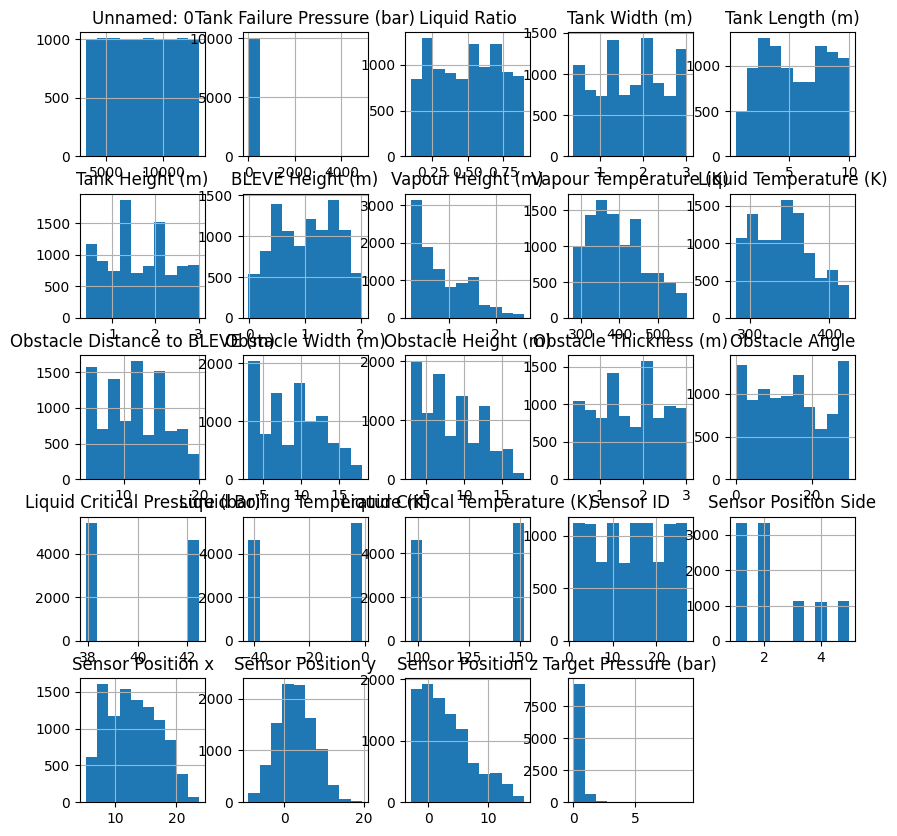

In [8]:
train_df.hist(figsize = (10,10), bins=10)

array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'Tank Failure Pressure (bar)'}>,
        <Axes: title={'center': 'Liquid Ratio'}>,
        <Axes: title={'center': 'Tank Width (m)'}>,
        <Axes: title={'center': 'Tank Length (m)'}>],
       [<Axes: title={'center': 'Tank Height (m)'}>,
        <Axes: title={'center': 'BLEVE Height (m)'}>,
        <Axes: title={'center': 'Vapour Height (m)'}>,
        <Axes: title={'center': 'Vapour Temperature (K)'}>,
        <Axes: title={'center': 'Liquid Temperature (K)'}>],
       [<Axes: title={'center': 'Obstacle Distance to BLEVE (m)'}>,
        <Axes: title={'center': 'Obstacle Width (m)'}>,
        <Axes: title={'center': 'Obstacle Height (m)'}>,
        <Axes: title={'center': 'Obstacle Thickness (m)'}>,
        <Axes: title={'center': 'Obstacle Angle'}>],
       [<Axes: title={'center': 'Liquid Critical Pressure (bar)'}>,
        <Axes: title={'center': 'Liquid Boiling Temperature (K)'}>,
        <Axes: tit

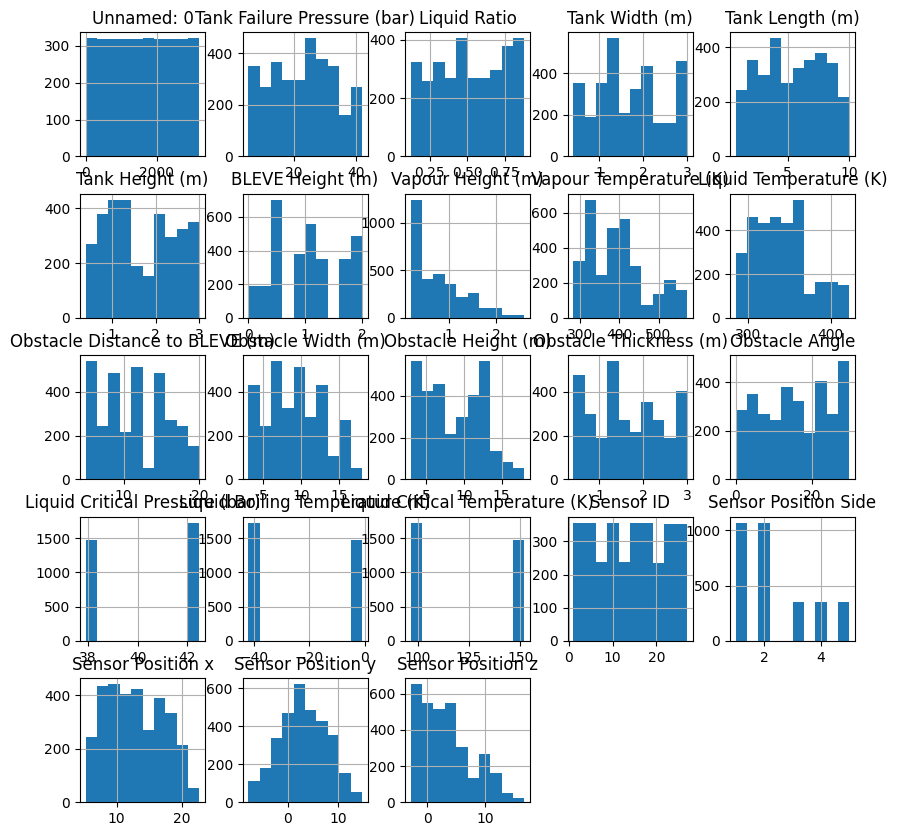

In [9]:
test_df.hist(figsize = (10,10), bins=10)

### 1.3 Categorical Variable Noise Reduction
We check 'Status' for unique values and find typing mistakes, which we replace with the properly spelled status values. For missing values, we replace them with the mode in train_df, which is 'Subcooled'.

In [10]:
# Check for and print different categories in categorical variable status

print(train_df['Status'].unique())

['Superheated' 'Superheat' 'Subcooled' 'subcooled' 'Saperheated' 'Subcool'
 'Subcoled' 'superheated' nan]


In [11]:
print(test_df['Status'].unique())

['Subcooled' 'Superheated']


In [12]:
# Check for the number of values in each category in variable 'Status' in train_df

print(train_df['Status'].value_counts())


Status
Subcooled      6208
Superheated    3754
subcooled        23
Subcool          17
Subcoled         14
Saperheated      10
superheated       9
Superheat         7
Name: count, dtype: int64


In [13]:
# Replace the different typos in 'Status' values with "Subcooled' and 'Superheated' ['Superheated' 'Superheat' 'Subcooled' 'subcooled' 'Saperheated' 'Subcool'
#  'Subcoled' 'superheated' nan] and replace nan with mode imputation with 'Supercooled'

status_mapping = {
    'Superheated': 'Superheated',
    'Superheat': 'Superheated',
    'Subcooled': 'Subcooled',
    'subcooled': 'Subcooled',
    'Saperheated': 'Superheated',
    'Subcool': 'Subcooled',
    'Subcoled': 'Subcooled',
    'superheated': 'Superheated'
}

train_df['Status'] = train_df['Status'].map(status_mapping)
test_df['Status'] = test_df['Status'].map(status_mapping)

# Impute NaN values with the mode of 'Status' in the training data
mode_status = train_df['Status'].mode()[0]
train_df['Status'].fillna(mode_status, inplace=True)
test_df['Status'].fillna(mode_status, inplace=True)

print(train_df['Status'].unique())
print(test_df['Status'].unique())
print(train_df['Status'].value_counts())

['Superheated' 'Subcooled']
['Subcooled' 'Superheated']
Status
Subcooled      6270
Superheated    3780
Name: count, dtype: int64


<ipython-input-13-68e7745a4b9f>:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Status'].fillna(mode_status, inplace=True)
<ipython-input-13-68e7745a4b9f>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

In [14]:
# Check for unique values of 'Status' in train_df

print(train_df['Status'].unique())


['Superheated' 'Subcooled']


In [15]:
print(train_df['Status'].value_counts())

Status
Subcooled      6270
Superheated    3780
Name: count, dtype: int64


### 1.4 Handling Missing Values with KNN Imputation
Missing values were found in train_df but not in test_df. k-NN (k-nearest neighbors) imputation was applied to missing values in train_df.

In [16]:
# Checking for missing values in training dataset

print(train_df.isnull().sum())

Unnamed: 0                          7
Tank Failure Pressure (bar)        10
Liquid Ratio                        9
Tank Width (m)                      7
Tank Length (m)                     5
Tank Height (m)                     8
BLEVE Height (m)                   10
Vapour Height (m)                   9
Vapour Temperature (K)             28
Liquid Temperature (K)             28
Obstacle Distance to BLEVE (m)      8
Obstacle Width (m)                  8
Obstacle Height (m)                 8
Obstacle Thickness (m)              8
Obstacle Angle                      8
Status                              0
Liquid Critical Pressure (bar)     28
Liquid Boiling Temperature (K)     27
Liquid Critical Temperature (K)    29
Sensor ID                           8
Sensor Position Side               10
Sensor Position x                   7
Sensor Position y                   9
Sensor Position z                   7
Target Pressure (bar)               6
dtype: int64


In [17]:
# Checking for missing values

print(test_df.isnull().sum())

Unnamed: 0                         0
Tank Failure Pressure (bar)        0
Liquid Ratio                       0
Tank Width (m)                     0
Tank Length (m)                    0
Tank Height (m)                    0
BLEVE Height (m)                   0
Vapour Height (m)                  0
Vapour Temperature (K)             0
Liquid Temperature (K)             0
Obstacle Distance to BLEVE (m)     0
Obstacle Width (m)                 0
Obstacle Height (m)                0
Obstacle Thickness (m)             0
Obstacle Angle                     0
Status                             0
Liquid Critical Pressure (bar)     0
Liquid Boiling Temperature (K)     0
Liquid Critical Temperature (K)    0
Sensor ID                          0
Sensor Position Side               0
Sensor Position x                  0
Sensor Position y                  0
Sensor Position z                  0
dtype: int64


In [18]:
# Replacing missing values in numeric cols in train_df with KNN imputer
!pip install scikit-learn
from sklearn.impute import KNNImputer
# Identify numeric columns
numeric_cols = train_df.select_dtypes(include=np.number).columns
# Apply KNN Imputation to numeric columns
imputer = KNNImputer(n_neighbors=5)
train_df[numeric_cols] = imputer.fit_transform(train_df[numeric_cols])
# Verify that missing values are handled in numeric columns
print(train_df[numeric_cols].isnull().sum())

Unnamed: 0                         0
Tank Failure Pressure (bar)        0
Liquid Ratio                       0
Tank Width (m)                     0
Tank Length (m)                    0
Tank Height (m)                    0
BLEVE Height (m)                   0
Vapour Height (m)                  0
Vapour Temperature (K)             0
Liquid Temperature (K)             0
Obstacle Distance to BLEVE (m)     0
Obstacle Width (m)                 0
Obstacle Height (m)                0
Obstacle Thickness (m)             0
Obstacle Angle                     0
Liquid Critical Pressure (bar)     0
Liquid Boiling Temperature (K)     0
Liquid Critical Temperature (K)    0
Sensor ID                          0
Sensor Position Side               0
Sensor Position x                  0
Sensor Position y                  0
Sensor Position z                  0
Target Pressure (bar)              0
dtype: int64


### 1.5 One-hot Encoding Categorical Variable 'Status'
'Status' was one-hot encoded into 2 columns, 'Status_Superheated' and 'Status_Subcooled' with boolean values signifying each.

In [19]:
# Apply one-hot encoding to the 'Status' column in both dataframes
train_df = pd.get_dummies(train_df, columns=['Status'], prefix='Status')
test_df = pd.get_dummies(test_df, columns=['Status'], prefix='Status')

# Print the first few rows to see the result
print(train_df.head())

   Unnamed: 0  Tank Failure Pressure (bar)  Liquid Ratio  Tank Width (m)  \
0      3203.0                        14.26          0.25            1.58   
1      3204.0                        14.14          0.25            1.59   
2      3205.0                        14.05          0.24            1.62   
3      3206.0                        14.17          0.24            1.59   
4      3207.0                        14.09          0.24            1.59   

   Tank Length (m)  Tank Height (m)  BLEVE Height (m)  Vapour Height (m)  \
0             8.61             1.79              1.01               1.40   
1             8.58             1.81              1.00               1.41   
2             8.59             1.79              0.98               1.38   
3             8.60             1.80              0.98               1.40   
4             8.60             1.80              1.00               1.40   

   Vapour Temperature (K)  Liquid Temperature (K)  ...  \
0                  457.14   

In [20]:
print(test_df.head())

   Unnamed: 0  Tank Failure Pressure (bar)  Liquid Ratio  Tank Width (m)  \
0           0                         37.9      0.412227             0.8   
1           1                         37.9      0.412227             0.8   
2           2                         37.9      0.412227             0.8   
3           3                         37.9      0.412227             0.8   
4           4                         37.9      0.412227             0.8   

   Tank Length (m)  Tank Height (m)  BLEVE Height (m)  Vapour Height (m)  \
0              6.6              0.4               0.8                0.2   
1              6.6              0.4               0.8                0.2   
2              6.6              0.4               0.8                0.2   
3              6.6              0.4               0.8                0.2   
4              6.6              0.4               0.8                0.2   

   Vapour Temperature (K)  Liquid Temperature (K)  ...  \
0                   317.6   

### 1.6 Multicollinearity Check
A correlation matrix was generated to check for multicollinearity.

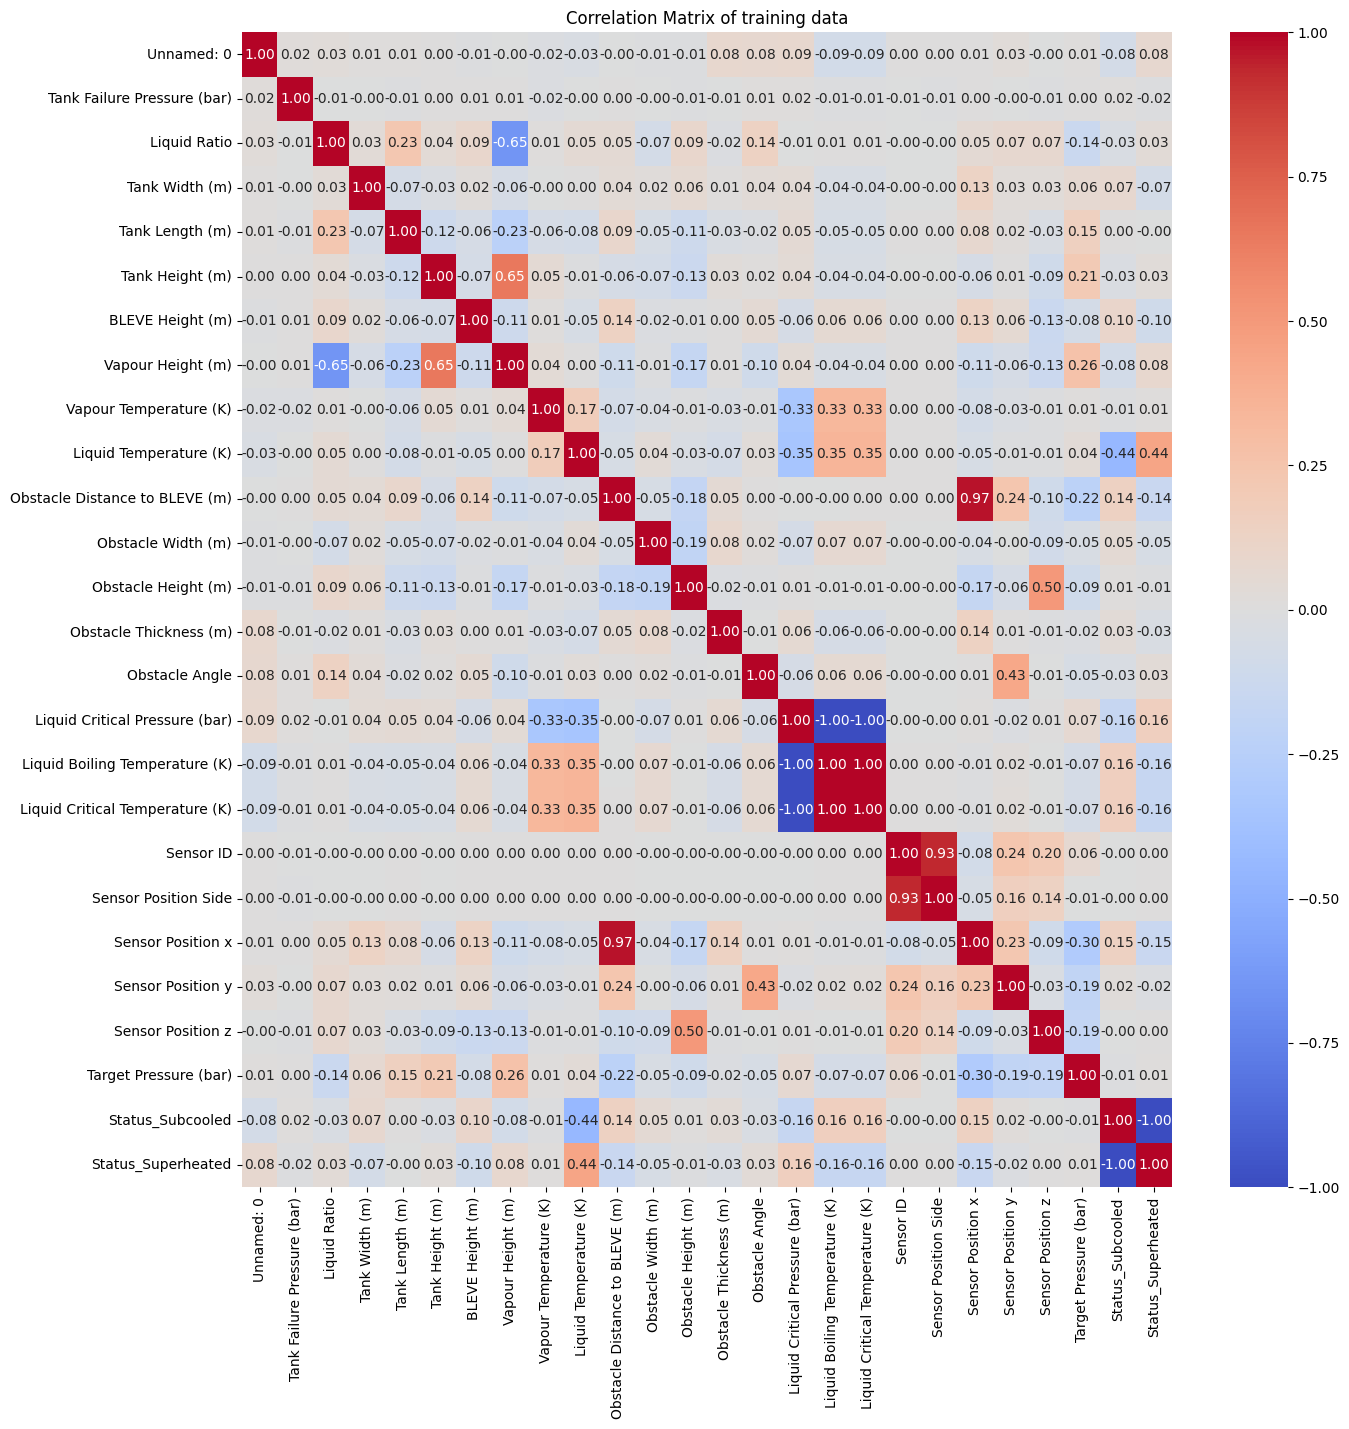

In [21]:
# Checking for multicollinearity in train_df using correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(train_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of training data')
plt.show()

The 'Unnamed: 0' variable is dropped due to it being the index.

In [22]:
# Drop the 'Unnamed: 0' column from train_df
train_df = train_df.drop('Unnamed: 0', axis=1)

# Drop the 'Unnamed: 0' column from test_df
test_df = test_df.drop('Unnamed: 0', axis=1)

# Verify that the column has been dropped (optional)
print(train_df.head())

   Tank Failure Pressure (bar)  Liquid Ratio  Tank Width (m)  Tank Length (m)  \
0                        14.26          0.25            1.58             8.61   
1                        14.14          0.25            1.59             8.58   
2                        14.05          0.24            1.62             8.59   
3                        14.17          0.24            1.59             8.60   
4                        14.09          0.24            1.59             8.60   

   Tank Height (m)  BLEVE Height (m)  Vapour Height (m)  \
0             1.79              1.01               1.40   
1             1.81              1.00               1.41   
2             1.79              0.98               1.38   
3             1.80              0.98               1.40   
4             1.80              1.00               1.40   

   Vapour Temperature (K)  Liquid Temperature (K)  \
0                  457.14                  423.07   
1                  457.71                  422.82   

In [23]:
print(test_df.head())

   Tank Failure Pressure (bar)  Liquid Ratio  Tank Width (m)  Tank Length (m)  \
0                         37.9      0.412227             0.8              6.6   
1                         37.9      0.412227             0.8              6.6   
2                         37.9      0.412227             0.8              6.6   
3                         37.9      0.412227             0.8              6.6   
4                         37.9      0.412227             0.8              6.6   

   Tank Height (m)  BLEVE Height (m)  Vapour Height (m)  \
0              0.4               0.8                0.2   
1              0.4               0.8                0.2   
2              0.4               0.8                0.2   
3              0.4               0.8                0.2   
4              0.4               0.8                0.2   

   Vapour Temperature (K)  Liquid Temperature (K)  \
0                   317.6                   337.5   
1                   317.6                   337.5   

We check for multicollinearity again.

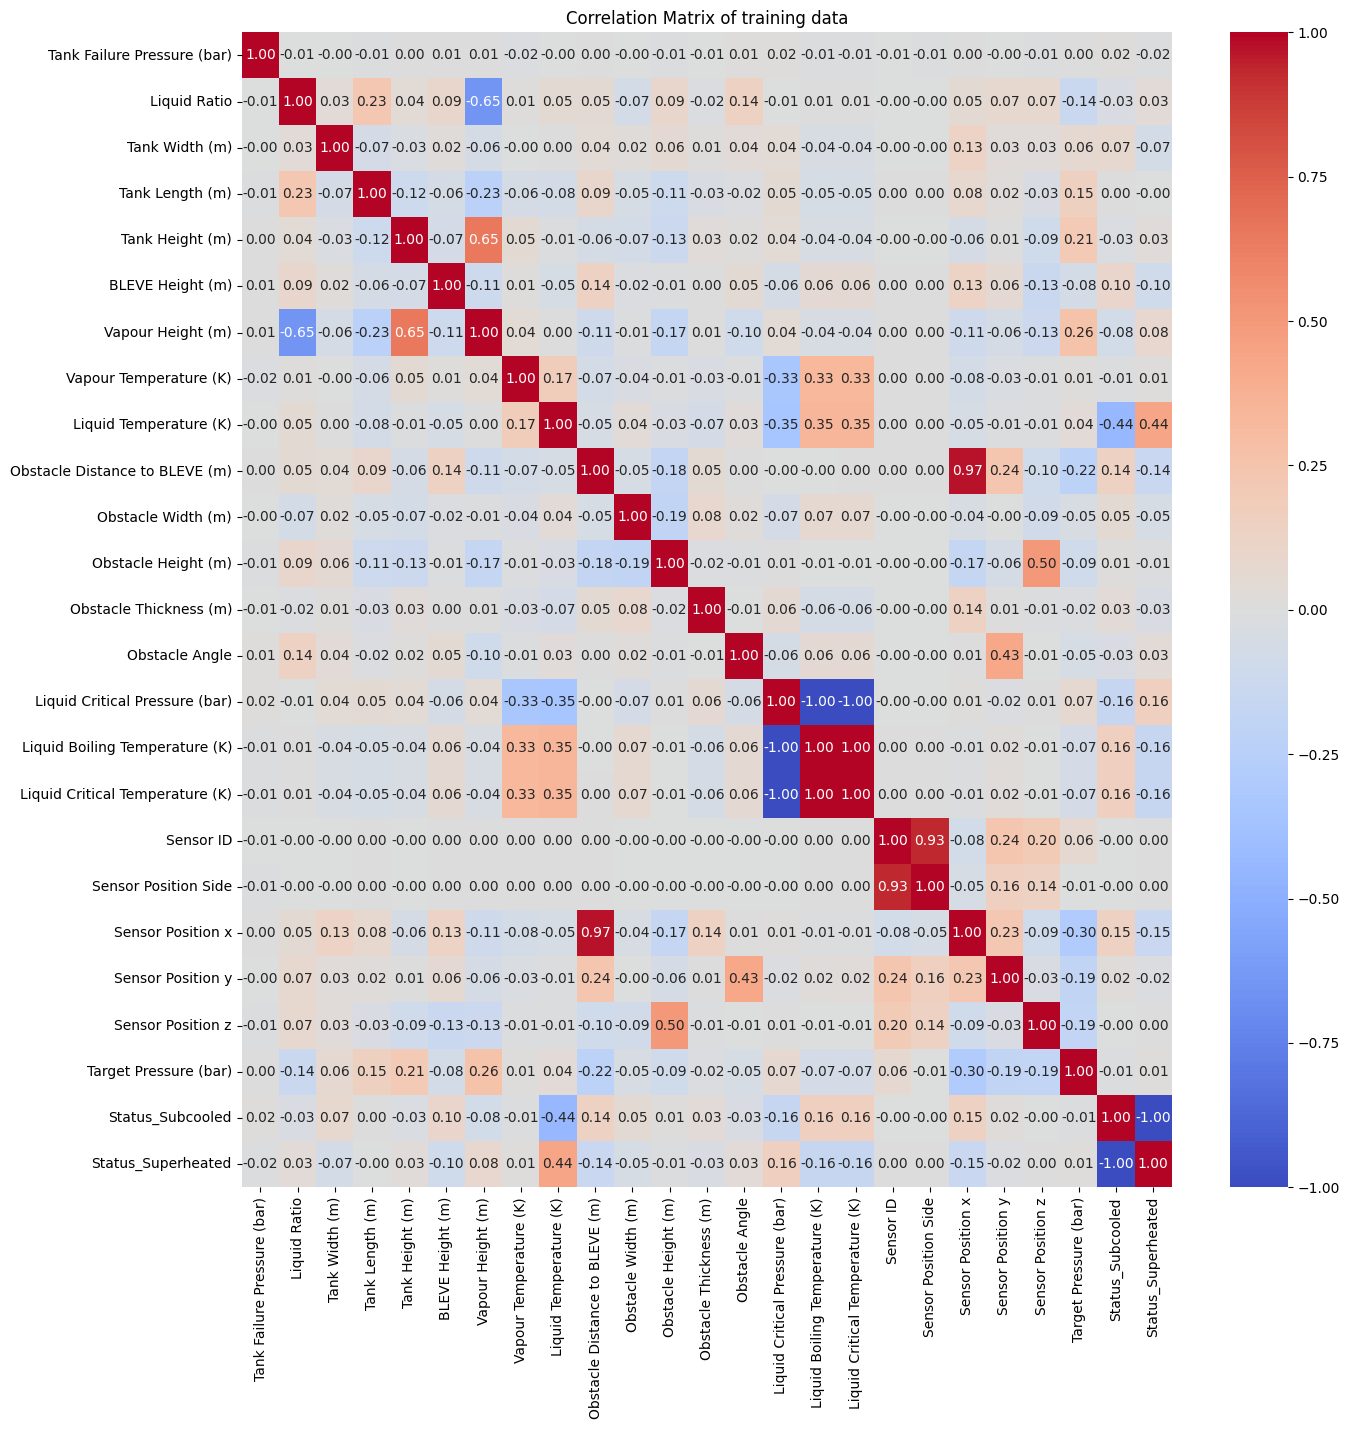

In [24]:
# Checking for multicollinearity again
plt.figure(figsize=(15, 15))
sns.heatmap(train_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of training data')
plt.show()

We see various multicollinear pairs in this repeated correlation matrix. minus the index. 'Status_Superheated' and 'Status_Subcooled' are perfectly multicollinear, as are the trio of Liquid Critical Temperature, Critical Pressure and Boiling Temperature.

'Sensor Position x' and 'Obstacle Distance to BLEVE (m)' are highly multicollinear too, and so are 'Sensor ID' and 'Sensor Position Side'. A highl-moderately multicollinear pair are 'Vapour Height' and 'Liquid Ratio'. One of each pair could be candidates for dropping.

### 1.7 Outlier check and initial outlier handling
We check for outliers via scatter plots for all variables. We see some decimal values in 'Sensor ID' and' Sensor Position Side', which is unacceptable. We turn the decimal values to integer values by discarding the digit after decimal to retain discrete values for these 2 variables. More outlier handling is to follow feature engineering.


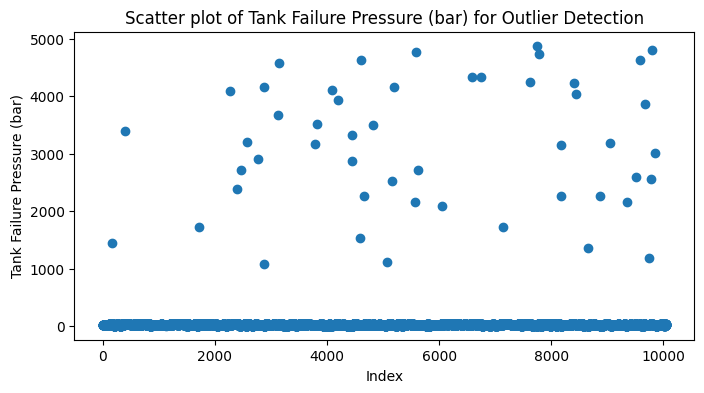

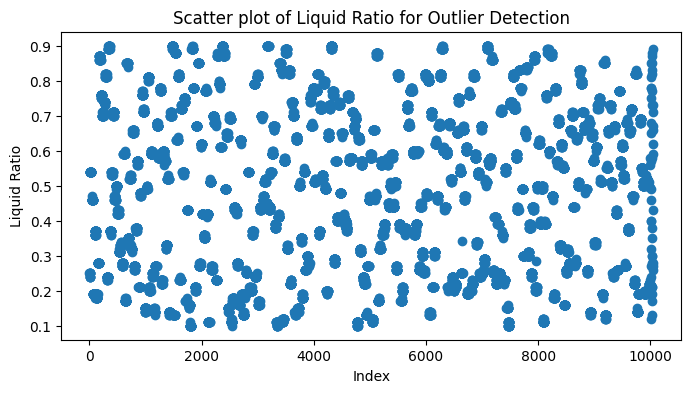

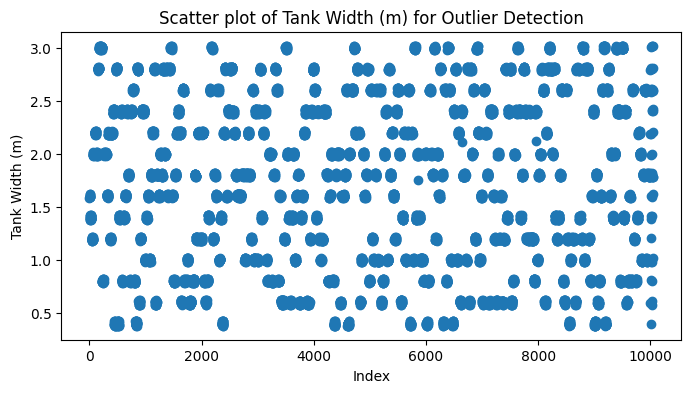

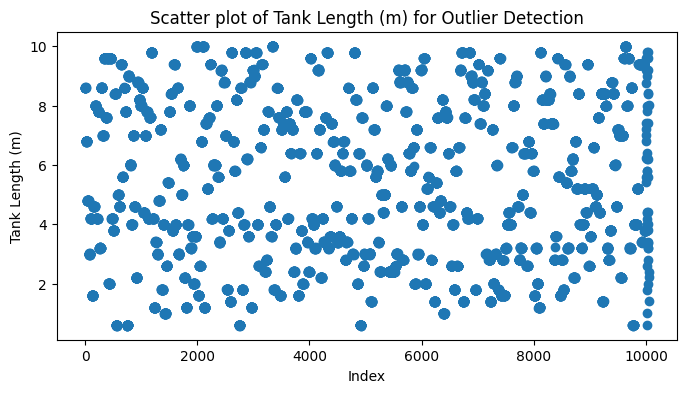

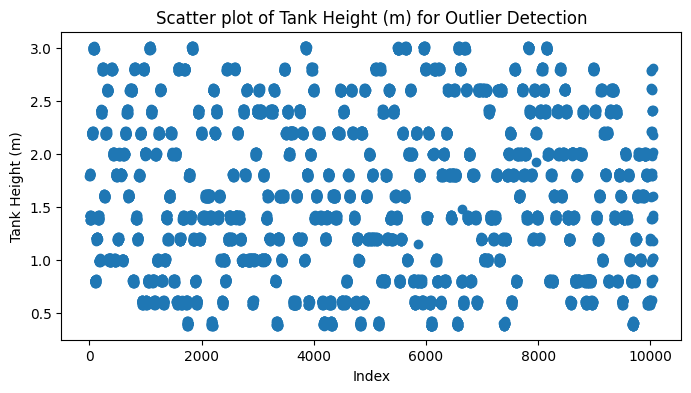

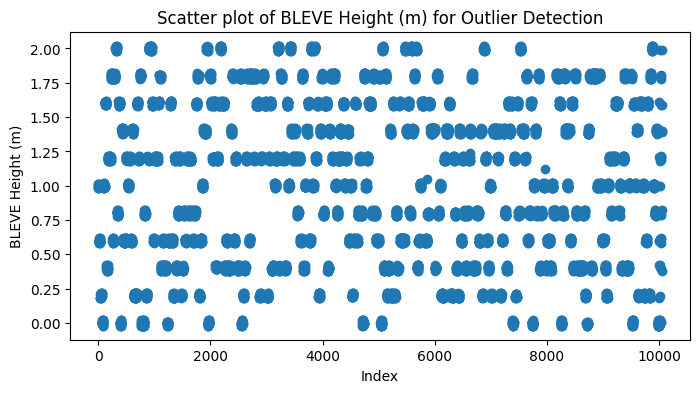

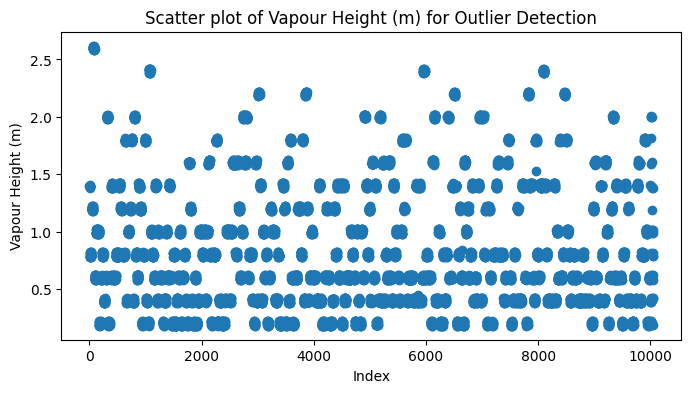

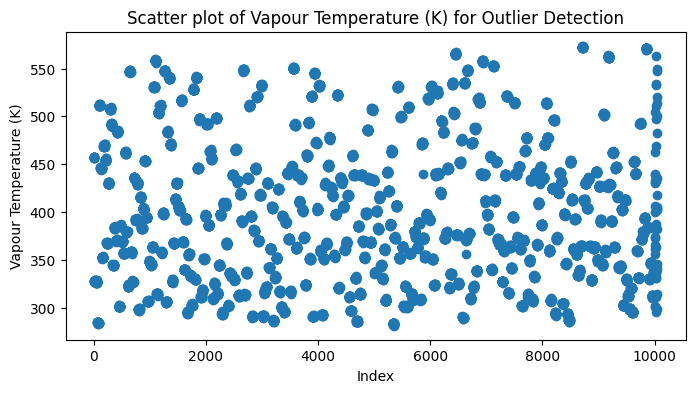

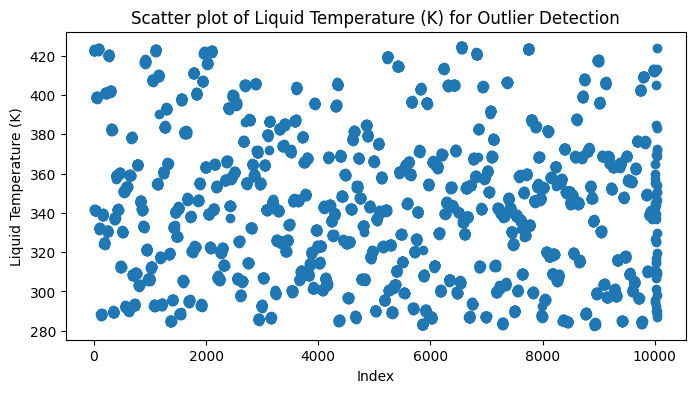

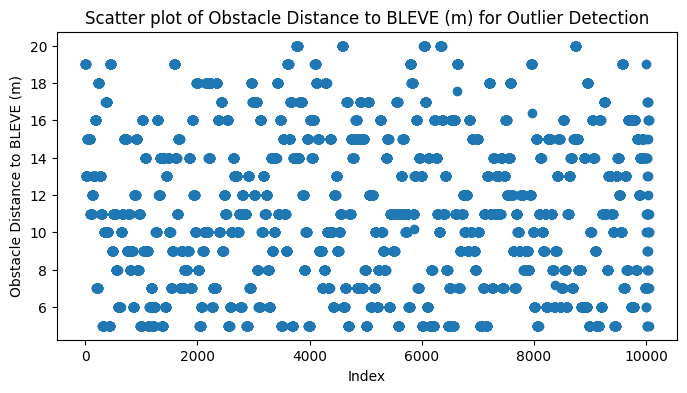

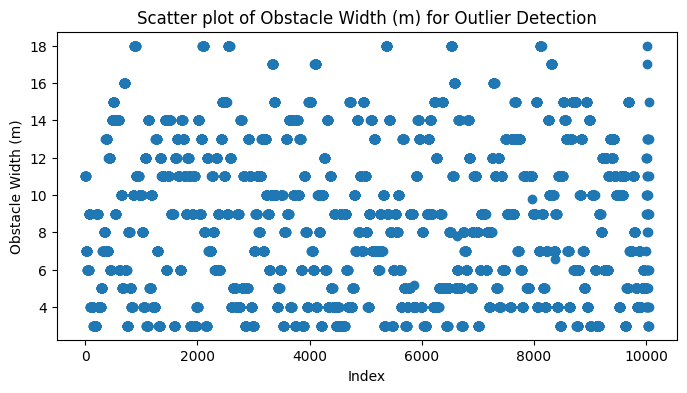

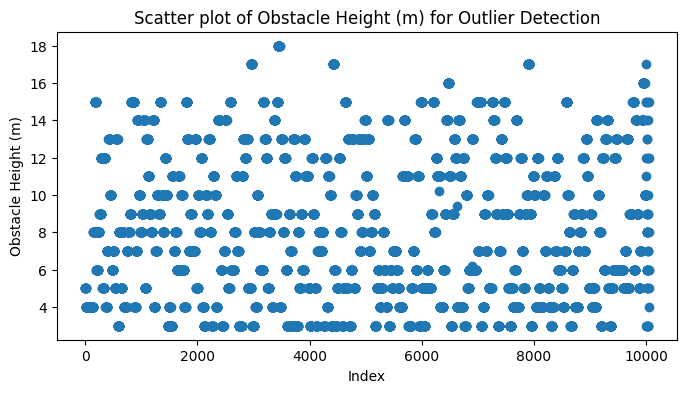

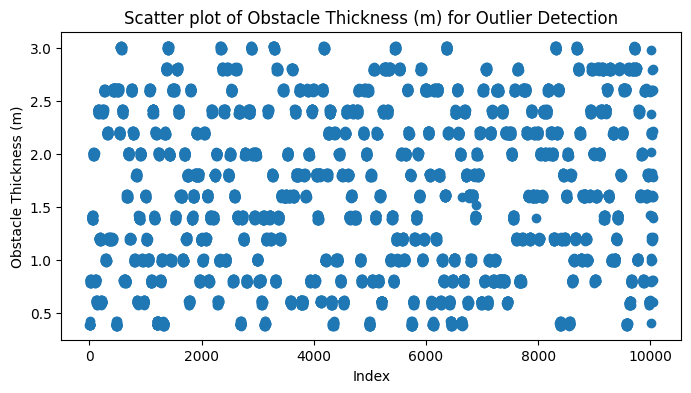

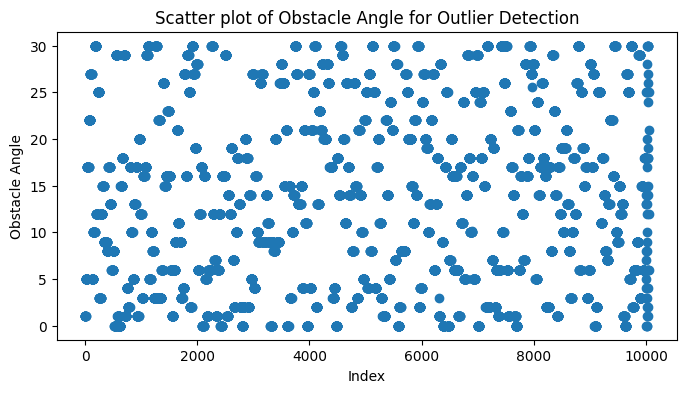

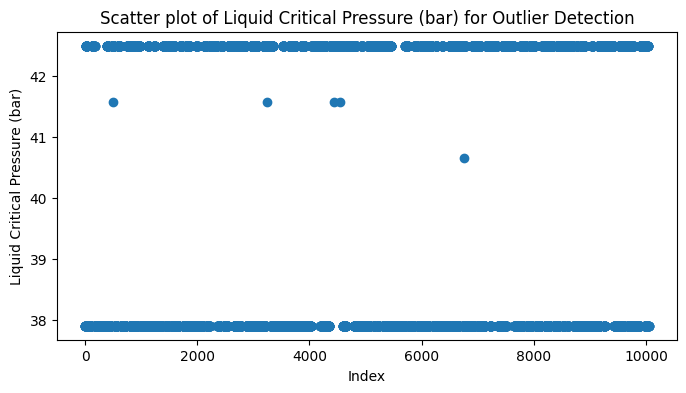

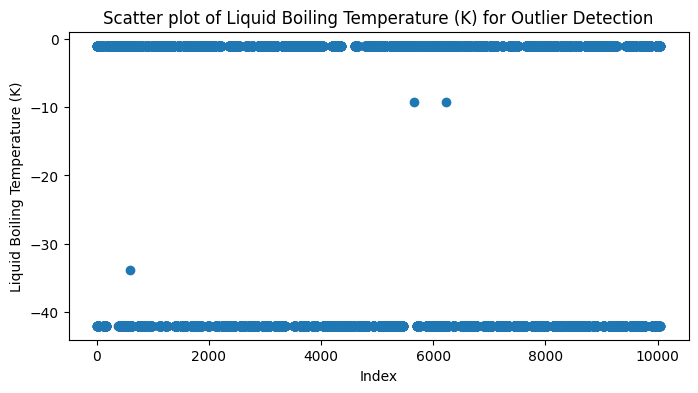

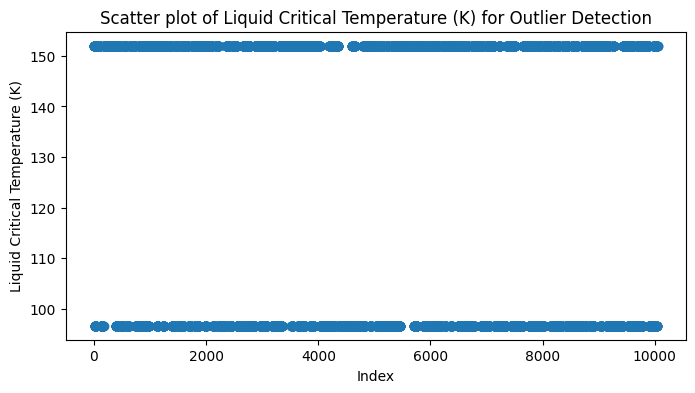

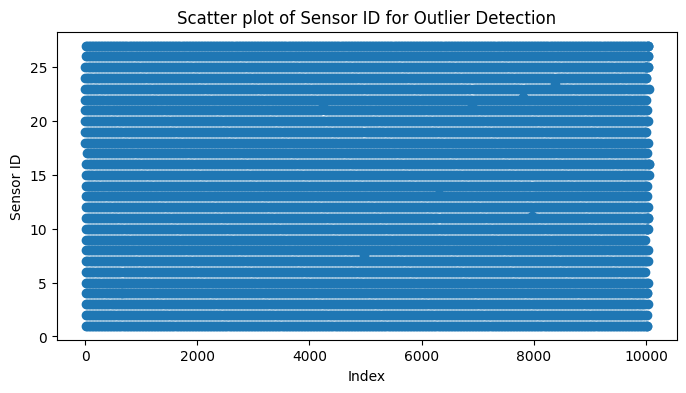

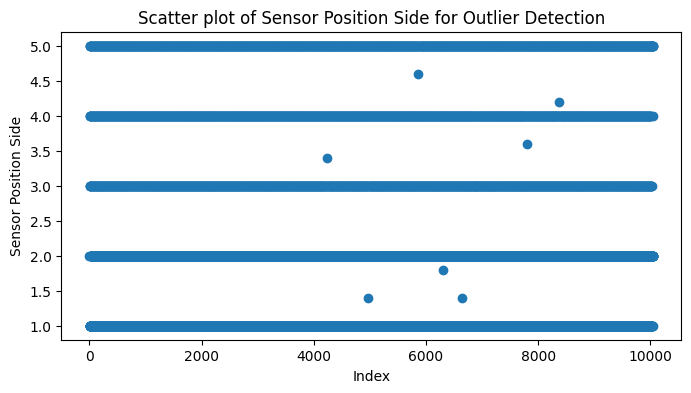

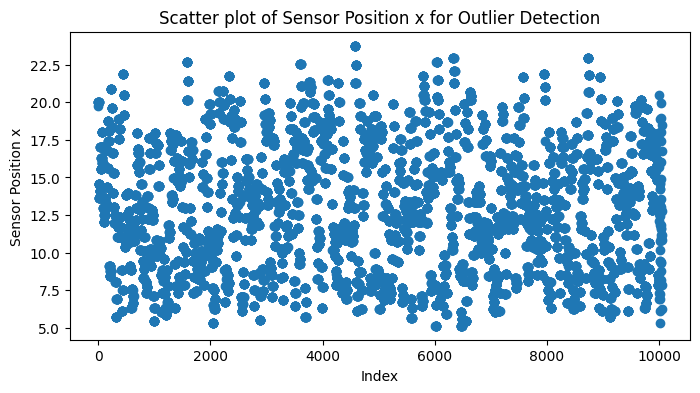

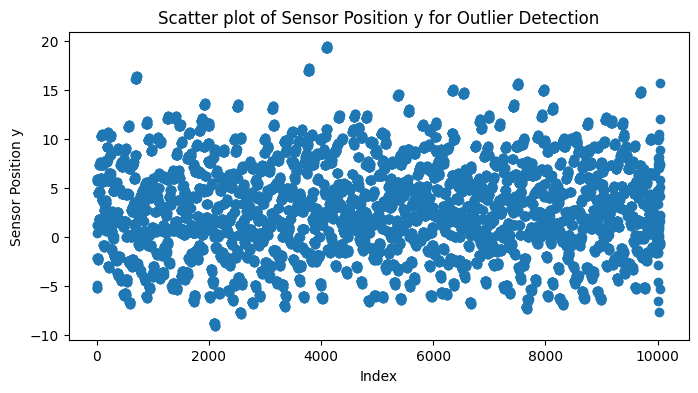

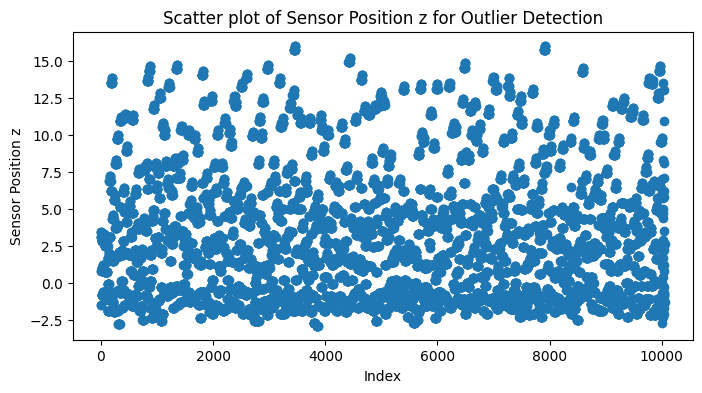

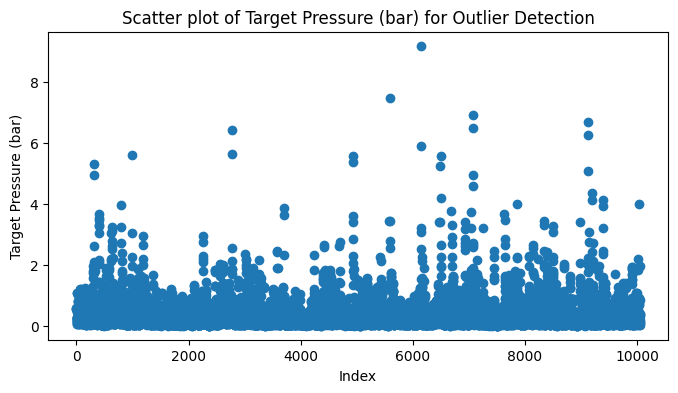

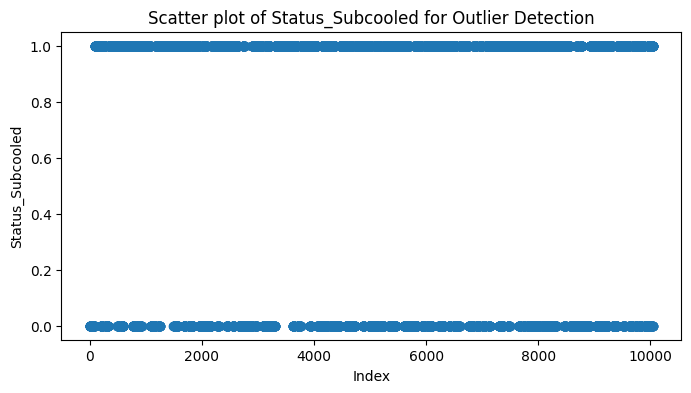

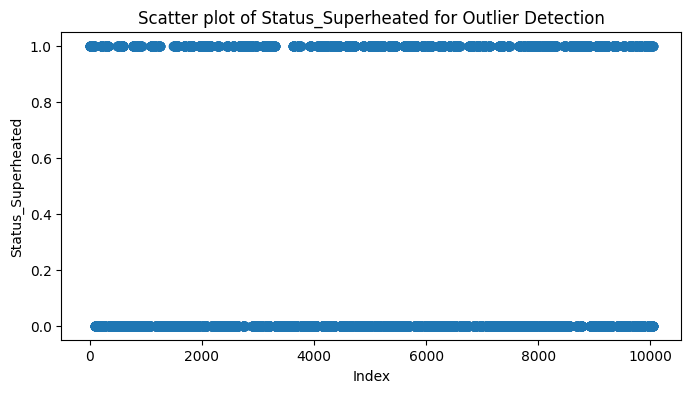

In [25]:
# prompt: do scatter plots for outlier detection for all variables

import matplotlib.pyplot as plt
# Identify columns to plot for outlier detection
columns_to_plot = [col for col in train_df.columns]

# Create scatter plots for each variable against the index
for col in columns_to_plot:
    plt.figure(figsize=(8, 4))
    plt.scatter(train_df.index, train_df[col])
    plt.title(f'Scatter plot of {col} for Outlier Detection')
    plt.xlabel('Index')
    plt.ylabel(col)
    plt.show()

In [26]:
# Check for unique values in 'Sensor Position Side'
print("Unique values in 'Sensor Position Side' before filtering:")
print(train_df['Sensor Position Side'].unique())

Unique values in 'Sensor Position Side' before filtering:
[2.  3.  4.  5.  1.  3.4 1.4 4.6 1.8 3.6 4.2]


In [27]:
# Check for unique values in 'Sensor Position Side'
print("Unique values in 'Sensor Position Side' before filtering:")
print(test_df['Sensor Position Side'].unique())

Unique values in 'Sensor Position Side' before filtering:
[1 2 3 4 5]


In [28]:
# Check for unique values in 'Sensor ID'
print("Unique values in 'Sensor ID' before filtering:")
print(train_df['Sensor ID'].unique())

Unique values in 'Sensor ID' before filtering:
[18.  19.  20.  21.  22.  23.  24.  25.  26.  27.   1.   2.   3.   4.
  5.   6.   7.   8.   9.  10.  11.  12.  13.  14.  15.  16.  17.  21.4
  7.6 13.8 21.6 22.2 11.2 23.4]


In [29]:
# Check for unique values in 'Sensor ID'
print("Unique values in 'Sensor ID' before filtering:")
print(test_df['Sensor ID'].unique())

Unique values in 'Sensor ID' before filtering:
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27]


In [30]:
# Remove rows with non-integer values from 'Sensor ID' and 'Sensor Position Side' in train_df

import pandas as pd
# Before removing rows
print("Shape before removing rows with non-integer values:", train_df.shape)

# Remove rows where 'Sensor ID' is not an integer
train_df = train_df[pd.to_numeric(train_df['Sensor ID'], errors='coerce').notna()]
train_df['Sensor ID'] = train_df['Sensor ID'].astype(int)

# Remove rows where 'Sensor Position Side' is not an integer
train_df = train_df[pd.to_numeric(train_df['Sensor Position Side'], errors='coerce').notna()]
train_df['Sensor Position Side'] = train_df['Sensor Position Side'].astype(int)

# After removing rows
print("Shape after removing rows with non-integer values:", train_df.shape)

# Verify the data types
print(train_df[['Sensor ID', 'Sensor Position Side']].dtypes)


Shape before removing rows with non-integer values: (10050, 25)
Shape after removing rows with non-integer values: (10050, 25)
Sensor ID               int64
Sensor Position Side    int64
dtype: object


In [31]:
# Check for unique values in 'Sensor Position Side'
print("Unique values in 'Sensor Position Side' after filtering:")
print(train_df['Sensor Position Side'].unique())

Unique values in 'Sensor Position Side' after filtering:
[2 3 4 5 1]


In [32]:
# Check for unique values in 'Sensor ID'
print("Unique values in 'Sensor ID' after filtering:")
print(train_df['Sensor ID'].unique())

Unique values in 'Sensor ID' after filtering:
[18 19 20 21 22 23 24 25 26 27  1  2  3  4  5  6  7  8  9 10 11 12 13 14
 15 16 17]


In [33]:
# check number of rows in train_df

print("Number of rows in train_df:", len(train_df))

Number of rows in train_df: 10050


## 2. Feature Elimination, Engineering and Further Outlier Handling


### 2.1 Feature Elimination
In our quest for a sparse model, we tried different combinations dropping multicollinear features, and referred to SHAP Feature Importance Plot (see best model interpretation section). What worked best are not dropping powerful multicoillinear values such as 'Sensor ID' and 'Sensor Position Side' but only dropping selective values as seen in the code that is not commented out below.

In [34]:
# # Correlation plot-based multicollinearity drop
# train_df = train_df.drop(['Status_Superheated', 'Sensor Position Side', 'Liquid Boiling Temperature (K)', 'Liquid Critical Pressure (bar)', 'Obstacle Distance to BLEVE (m)' ], axis=1)
# test_df = test_df.drop(['Status_Superheated', 'Sensor Position Side', 'Liquid Boiling Temperature (K)', 'Liquid Critical Pressure (bar)', 'Obstacle Distance to BLEVE (m)' ], axis=1)

In [35]:
# # Try different sets of features : Correlation plot-based multicollinearity drop
# train_df = train_df.drop(['Status_Superheated', 'Sensor Position Side', 'Liquid Boiling Temperature (K)', 'Liquid Critical Temperature (K)', 'Obstacle Distance to BLEVE (m)' ], axis=1)
# test_df = test_df.drop(['Status_Superheated', 'Sensor Position Side', 'Liquid Boiling Temperature (K)', 'Liquid Critical Temperature (K)', 'Obstacle Distance to BLEVE (m)' ], axis=1)

In [36]:
# # Try different sets of features 2 : Correlation plot-based multicollinearity drop
# train_df = train_df.drop(['Status_Superheated', 'Sensor ID', 'Liquid Boiling Temperature (K)', 'Liquid Critical Temperature (K)', 'Obstacle Distance to BLEVE (m)' ], axis=1)
# test_df = test_df.drop(['Status_Superheated', 'Sensor ID', 'Liquid Boiling Temperature (K)', 'Liquid Critical Temperature (K)', 'Obstacle Distance to BLEVE (m)' ], axis=1)

In [37]:
# # Try different sets of features 3 : Correlation plot-based multicollinearity drop
# train_df = train_df.drop(['Status_Superheated', 'Liquid Boiling Temperature (K)', 'Liquid Critical Temperature (K)', 'Obstacle Distance to BLEVE (m)' ], axis=1)
# test_df = test_df.drop(['Status_Superheated',  'Liquid Boiling Temperature (K)', 'Liquid Critical Temperature (K)', 'Obstacle Distance to BLEVE (m)' ], axis=1)

In [38]:
# Try different sets of features 4 : Correlation plot-based multicollinearity drop
train_df = train_df.drop(['Status_Superheated', 'Liquid Boiling Temperature (K)', 'Liquid Critical Pressure (bar)', 'Obstacle Distance to BLEVE (m)', 'Tank Height (m)', 'Liquid Ratio' ], axis=1)
test_df = test_df.drop(['Status_Superheated',  'Liquid Boiling Temperature (K)', 'Liquid Critical Pressure (bar)', 'Obstacle Distance to BLEVE (m)', 'Tank Height (m)', 'Liquid Ratio' ], axis=1)

In [39]:
# # Try different sets of features 5 : Correlation plot-based multicollinearity drop + zero correlation variables
# train_df = train_df.drop(['Status_Superheated', 'Liquid Boiling Temperature (K)', 'Liquid Critical Pressure (bar)', 'Obstacle Distance to BLEVE (m)', 'Tank Height (m)', 'Liquid Ratio', 'Tank Failure Pressure (bar)' ], axis=1)
# test_df = test_df.drop(['Status_Superheated',  'Liquid Boiling Temperature (K)', 'Liquid Critical Pressure (bar)', 'Obstacle Distance to BLEVE (m)', 'Tank Height (m)', 'Liquid Ratio', 'Tank Failure Pressure (bar)' ], axis=1)

In [40]:
# # Try different sets of features 6 : SHAP Zero predictive power drop
# train_df = train_df.drop(['Status_Superheated', 'Liquid Boiling Temperature (K)','Liquid Critical Temperature (K)', 'Liquid Critical Pressure (bar)', 'Obstacle Angle', 'Obstacle Thickness (m)', 'Obstacle Height (m)', 'Vapour Temperature (K)', 'Tank Height (m)', 'Liquid Ratio' ], axis=1)
# test_df = test_df.drop(['Status_Superheated', 'Liquid Boiling Temperature (K)','Liquid Critical Temperature (K)', 'Liquid Critical Pressure (bar)', 'Obstacle Angle', 'Obstacle Thickness (m)', 'Obstacle Height (m)', 'Vapour Temperature (K)', 'Tank Height (m)', 'Liquid Ratio' ], axis=1)

In [41]:
# # Try different sets of features 7 : SHAP Zero predictive power drop 2
# train_df = train_df.drop(['Status_Superheated','Liquid Temperature (K)', 'Liquid Boiling Temperature (K)','Liquid Critical Temperature (K)', 'Liquid Critical Pressure (bar)', 'Obstacle Angle', 'Obstacle Thickness (m)', 'Obstacle Height (m)', 'Vapour Temperature (K)', 'Tank Height (m)', 'Liquid Ratio' ], axis=1)
# test_df = test_df.drop(['Status_Superheated','Liquid Temperature (K)', 'Liquid Boiling Temperature (K)','Liquid Critical Temperature (K)', 'Liquid Critical Pressure (bar)', 'Obstacle Angle', 'Obstacle Thickness (m)', 'Obstacle Height (m)', 'Vapour Temperature (K)', 'Tank Height (m)', 'Liquid Ratio' ], axis=1)

In [42]:
train_df.head()

Tank Failure Pressure (bar)  Tank Width (m)  Tank Length (m)  \
0                        14.26            1.58             8.61   
1                        14.14            1.59             8.58   
2                        14.05            1.62             8.59   
3                        14.17            1.59             8.60   
4                        14.09            1.59             8.60   

   BLEVE Height (m)  Vapour Height (m)  Vapour Temperature (K)  \
0              1.01               1.40                  457.14   
1              1.00               1.41                  457.71   
2              0.98               1.38                  456.58   
3              0.98               1.40                  456.81   
4              1.00               1.40                  456.93   

   Liquid Temperature (K)  Obstacle Width (m)  Obstacle Height (m)  \
0                  423.07                11.0                  5.0   
1                  422.82                11.0                  5.0   
2                  422.37                11.0                  5.0   
3                  423.28                11.0                  5.0   
4                  423.19                11.0                  5.0   

   Obstacle Thickness (m)  Obstacle Angle  Liquid Critical Temperature (K)  \
0                    0.39             1.0                            152.0   
1                    0.40             1.0                            152.0   
2                    0.40             1.0                            152.0   
3                    0.42             1.0                            152.0   
4                    0.39             1.0                            152.0   

   Sensor ID  Sensor Position Side  Sensor Position x  Sensor Position y  \
0         18                     2              19.75               5.70   
1         19                     3              20.00              -5.15   
2         20                     3              20.00              -5.15   
3         21                     3              20.00              -5.15   
4         22                     4              20.00              -4.90   

   Sensor Position z  Target Pressure (bar)  Status_Subcooled  
0                3.1               0.588298             False  
1               -1.5               0.551524             False  
2                0.8               0.550813             False  
3                3.1               0.528906             False  
4                3.4               0.454363             False

In [43]:
test_df.head()

Tank Failure Pressure (bar)  Tank Width (m)  Tank Length (m)  \
0                         37.9             0.8              6.6   
1                         37.9             0.8              6.6   
2                         37.9             0.8              6.6   
3                         37.9             0.8              6.6   
4                         37.9             0.8              6.6   

   BLEVE Height (m)  Vapour Height (m)  Vapour Temperature (K)  \
0               0.8                0.2                   317.6   
1               0.8                0.2                   317.6   
2               0.8                0.2                   317.6   
3               0.8                0.2                   317.6   
4               0.8                0.2                   317.6   

   Liquid Temperature (K)  Obstacle Width (m)  Obstacle Height (m)  \
0                   337.5                   9                   12   
1                   337.5                   9                   12   
2                   337.5                   9                   12   
3                   337.5                   9                   12   
4                   337.5                   9                   12   

   Obstacle Thickness (m)  Obstacle Angle  Liquid Critical Temperature (K)  \
0                     0.6               0                             96.7   
1                     0.6               0                             96.7   
2                     0.6               0                             96.7   
3                     0.6               0                             96.7   
4                     0.6               0                             96.7   

   Sensor ID  Sensor Position Side  Sensor Position x  Sensor Position y  \
0          1                     1               8.05               -4.3   
1          2                     1               8.05               -4.3   
2          3                     1               8.05               -4.3   
3          4                     1               8.05                0.0   
4          5                     1               8.05                0.0   

   Sensor Position z  Status_Subcooled  
0               -0.7              True  
1                5.1              True  
2               10.9              True  
3               -0.7              True  
4                5.1              True

In [44]:
# train_df = train_df.drop('Sensor ID', axis=1)
# test_df = test_df.drop('Sensor ID', axis=1)

In [45]:
print(train_df.head())

   Tank Failure Pressure (bar)  Tank Width (m)  Tank Length (m)  \
0                        14.26            1.58             8.61   
1                        14.14            1.59             8.58   
2                        14.05            1.62             8.59   
3                        14.17            1.59             8.60   
4                        14.09            1.59             8.60   

   BLEVE Height (m)  Vapour Height (m)  Vapour Temperature (K)  \
0              1.01               1.40                  457.14   
1              1.00               1.41                  457.71   
2              0.98               1.38                  456.58   
3              0.98               1.40                  456.81   
4              1.00               1.40                  456.93   

   Liquid Temperature (K)  Obstacle Width (m)  Obstacle Height (m)  \
0                  423.07                11.0                  5.0   
1                  422.82                11.0               

In [46]:
print(test_df.head())

   Tank Failure Pressure (bar)  Tank Width (m)  Tank Length (m)  \
0                         37.9             0.8              6.6   
1                         37.9             0.8              6.6   
2                         37.9             0.8              6.6   
3                         37.9             0.8              6.6   
4                         37.9             0.8              6.6   

   BLEVE Height (m)  Vapour Height (m)  Vapour Temperature (K)  \
0               0.8                0.2                   317.6   
1               0.8                0.2                   317.6   
2               0.8                0.2                   317.6   
3               0.8                0.2                   317.6   
4               0.8                0.2                   317.6   

   Liquid Temperature (K)  Obstacle Width (m)  Obstacle Height (m)  \
0                   337.5                   9                   12   
1                   337.5                   9               

In [47]:
print(train_df.shape)

(10050, 19)


In [48]:
print(test_df.shape)

(3203, 18)


### 2.2 Feature Engineering
We have tried various combinations of engineered features (as seen in the commented out code) simulteaneously with retaining features instead of eliminating them.

What worked best for model performance was eliminating the features in the previous section and creating a single engineered feature 'BLEVE Height (m) to 'Vapour Height (m) Ratio'.

A relatively sparse model with few engineered features seemed to work better than a model with original features retained and many new features added.

In [49]:
# Engineer 'BLEVE Height (m) to 'Vapour Height (m)' ratio feature

train_df['BLEVE to Vapour Height Ratio'] = train_df['BLEVE Height (m)'] / train_df['Vapour Height (m)']
test_df['BLEVE to Vapour Height Ratio'] = test_df['BLEVE Height (m)'] / test_df['Vapour Height (m)']

In [50]:
# # Pressure Temp Ratio
# train_df['Pressure Temp Ratio'] = train_df['Tank Failure Pressure (bar)'] / (train_df['Liquid Temperature (K)'])
# test_df['Pressure Temp Ratio'] = test_df['Tank Failure Pressure (bar)'] / (test_df['Liquid Temperature (K)'])

In [51]:
# # Engineering Overpressure and Overtemp
# train_df['Overpressure'] = train_df['Liquid Critical Pressure (bar)'] - train_df['Tank Failure Pressure (bar)']
# train_df['Overtemp'] = train_df['Liquid Critical Temperature (K)'] - train_df['Liquid Temperature (K)']
# test_df['Overpressure'] = test_df['Liquid Critical Pressure (bar)'] - test_df['Tank Failure Pressure (bar)']
# test_df['Overtemp'] = test_df['Liquid Critical Temperature (K)'] - test_df['Liquid Temperature (K)']

In [52]:
# # Engineering BLEVE Tank Height Ratio
# train_df['BLEVE Tank Height Ratio'] = train_df['BLEVE Height (m)'] / (train_df['Tank Height (m)'])
# test_df['BLEVE Tank Height Ratio'] = test_df['BLEVE Height (m)'] / (test_df['Tank Height (m)'])

In [53]:
# # Engineering Tank Volume and Surface Area
# train_df['Tank_Volume'] = train_df['Tank Width (m)'] * train_df['Tank Length (m)'] * train_df['Tank Height (m)']
# train_df['Tank_Surface_Area'] = 2 * (
#     train_df['Tank Width (m)'] * train_df['Tank Length (m)'] +
#     train_df['Tank Width (m)'] * train_df['Tank Height (m)'] +
#     train_df['Tank Length (m)'] * train_df['Tank Height (m)']
# )

# # Apply tank volume and surface area features to test_df
# test_df['Tank_Volume'] = test_df['Tank Width (m)'] * test_df['Tank Length (m)'] * test_df['Tank Height (m)']

# test_df['Tank_Surface_Area'] = 2 * (
#     test_df['Tank Width (m)'] * test_df['Tank Length (m)'] +
#     test_df['Tank Width (m)'] * test_df['Tank Height (m)'] +
#     test_df['Tank Length (m)'] * test_df['Tank Height (m)']
# )


In [54]:
# # Engineering Sensor Euclidean Distance
# train_df['Sensor Distance'] = np.sqrt(
#     train_df['Sensor Position x']**2 +
#     train_df['Sensor Position y']**2 +
#     train_df['Sensor Position z']**2
# )
# test_df['Sensor Distance'] = np.sqrt(
#     test_df['Sensor Position x']**2 +
#     test_df['Sensor Position y']**2 +
#     test_df['Sensor Position z']**2
# )

In [55]:
# # Engineering Obstacle Shielding
# train_df['Obstacle_Shielding'] = train_df['Obstacle Angle'] * train_df['Obstacle Thickness (m)']
# test_df['Obstacle_Shielding'] = test_df['Obstacle Angle'] * test_df['Obstacle Thickness (m)']

In [56]:
# # Engineering Liquid to Tank Volume Ratio
# train_df['Liquid_Ratio_Est'] = train_df['Liquid Ratio'] * train_df['Tank_Volume']
# test_df['Liquid_Ratio_Est'] = test_df['Liquid Ratio'] * test_df['Tank_Volume']

In [57]:
# # Engineering Vapour Liquid Temp Ratio
# train_df['Vapour Liquid Temp Ratio'] = train_df['Vapour Temperature (K)'] / (train_df['Liquid Temperature (K)'])
# test_df['Vapour Liquid Temp Ratio'] = test_df['Vapour Temperature (K)'] / (test_df['Liquid Temperature (K)'])

In [58]:
# # Engineering Obstacle Volume
# train_df['Obstacle_Volume'] = train_df['Obstacle Width (m)'] * train_df['Obstacle Height (m)'] * train_df['Obstacle Thickness (m)']
# test_df['Obstacle_Volume'] = test_df['Obstacle Width (m)'] * test_df['Obstacle Height (m)'] * test_df['Obstacle Thickness (m)']

In [59]:
# # Engineering Obstacle Aspect Ratio
# train_df['Tank_Aspect_Ratio'] = train_df['Tank Length (m)'] / (train_df['Tank Width (m)'])
# test_df['Tank_Aspect_Ratio'] = test_df['Tank Length (m)'] / (test_df['Tank Width (m)'])

In [60]:
# # Engineer 'Tank Width (m) to 'Obstacle Width (m)' ratio feature

# train_df['Tank to Obstacle Width Ratio'] = train_df['Tank Width (m)'] / train_df['Obstacle Width (m)']
# test_df['Tank to Obstacle Width Ratio'] = test_df['Tank Width (m)'] / test_df['Obstacle Width (m)']

In [61]:
# # Engineer 'Sensor Position Side to Sensor ID' ratio feature

# train_df['Sensor Position Side to Sensor ID'] = train_df['Sensor Position Side'] / train_df['Sensor ID']
# test_df['Sensor Position Side to Sensor ID'] = test_df['Sensor Position Side'] / train_df['Sensor ID']

In [62]:
# # Engineer 'Tank Failure Pressure (bar) to Liquid Temperature (K)' ratio feature

# train_df['Tank Failure Pressure Ratio to Liquid Temperature'] = train_df['Tank Failure Pressure (bar)'] / train_df['Liquid Temperature (K)']
# test_df['Tank Failure Pressure Ratio to Liquid Temperature'] = test_df['Tank Failure Pressure (bar)'] / train_df['Liquid Temperature (K)']

In [63]:
# #Try different sets of features 7 : SHAP Zero predictive power drop 2
# train_df = train_df.drop(['Status_Superheated','Liquid Temperature (K)', 'Liquid Boiling Temperature (K)','Liquid Critical Temperature (K)', 'Liquid Critical Pressure (bar)', 'Obstacle Angle', 'Obstacle Thickness (m)', 'Obstacle Height (m)', 'Vapour Temperature (K)', 'Tank Height (m)', 'Liquid Ratio' ], axis=1)
# test_df = test_df.drop(['Status_Superheated','Liquid Temperature (K)', 'Liquid Boiling Temperature (K)','Liquid Critical Temperature (K)', 'Liquid Critical Pressure (bar)', 'Obstacle Angle', 'Obstacle Thickness (m)', 'Obstacle Height (m)', 'Vapour Temperature (K)', 'Tank Height (m)', 'Liquid Ratio' ], axis=1)

### 2.3 Final Outlier Handling
Outliers in all columns but discrete or categorical values are handled via interquartile range (difference between thurd and first quartiles), where outliers are dropped if they are beyond either Q1-1.5xIQR or Q3 + 1.5xIQR.

Winsorization is another outlier handling technique that resets extrene values to data values at 5th or 95th percentile.

Winsorizing was also attempted but IQR led to better model performance, hence IQR was retained and winsorization commented out.

In [64]:
# Remove outliers from all variables except 'Sensor ID', 'Sensor Position Side', 'Status_Superheated' and 'Status_Subcooled' using IQR

import numpy as np
print("Shape before outlier removal:", train_df.shape)

# Columns to exclude from outlier removal
exclude_cols = ['Sensor ID', 'Sensor Position Side', 'Status_Subcooled']

# Identify numerical columns to consider for outlier removal
numerical_cols_for_outliers = [col for col in train_df.select_dtypes(include=np.number).columns if col not in exclude_cols]

# Apply IQR method to remove outliers from specified columns
for col in numerical_cols_for_outliers:
    Q1 = train_df[col].quantile(0.25)
    Q3 = train_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    train_df = train_df[(train_df[col] >= lower_bound) & (train_df[col] <= upper_bound)]

print("Shape after outlier removal:", train_df.shape)

Shape before outlier removal: (10050, 20)
Shape after outlier removal: (8253, 20)


In [65]:
#  # Remove outliers from all variables except 'Sensor ID', 'Sensor Position Side', 'Status_Superheated' and 'Status_Subcooled' using winsorization

# import numpy as np
# from scipy.stats.mstats import winsorize

# print("Shape before outlier removal:", train_df.shape)

# # Columns to exclude from outlier removal
# exclude_cols = ['Sensor ID', 'Sensor Position Side', 'Status_Subcooled', 'Status_Superheated']

# # Identify numerical columns to consider for outlier removal
# numerical_cols_for_outliers = [col for col in train_df.select_dtypes(include=np.number).columns if col not in exclude_cols]

# # Apply winsorization to specified columns
# for col in numerical_cols_for_outliers:
#     # winsorize(a, limits=None, inclusive=(True, True), inplace=False, axis=None, nan_policy='propagate')
#     # limits=(lower, upper): tuples of the percentages of the tails to cut off from the lower and upper end of the data.
#     # For example, limits=(0.05, 0.05) will cut off 5% from the lower end and 5% from the upper end.
#     train_df[col] = winsorize(train_df[col], limits=(0.05, 0.05))

# print("Shape after outlier removal:", train_df.shape)

## 3. Splitting and Scaling
Features and target are separated from the data frame and the data is split into training set (80% of the data) and validation set (20% of the data).

Standard scaler is fit (ensuring zero mean and unit variance) on the training data to prevent leakage. The scaling transformation is applied to test_df to ensure consistency between training and inference.

In [66]:
from sklearn.model_selection import train_test_split

# Define the target variable column name
target_column = 'Target Pressure (bar)'

# Separate features (X) and target (y) from train_df
X = train_df.drop(target_column, axis=1)  # Features (all columns except the target)
y = train_df[target_column]  # Target variable

# Split the data into training and validation sets (80/20 split)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_val: {X_val.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_val: {y_val.shape}")

Shape of X_train: (6602, 19)
Shape of X_val: (1651, 19)
Shape of y_train: (6602,)
Shape of y_val: (1651,)


In [67]:
from sklearn.preprocessing import StandardScaler
target_column = 'Target Pressure (bar)'

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the validation data using thefitted scaler
X_val_scaled = scaler.transform(X_val)


In [68]:
X_test_preprocessed = test_df.copy()

# Transform the preprocessed test data using the fitted scaler from training data
X_test_scaled = scaler.transform(X_test_preprocessed)


## 4. Running Different Models
We train 5 different models and review the R-squared (proportion of variation explained) and MAPE (mean absolute percentage error) scores to gauge performance.

### 4.1 LASSO Linear Regression Model
LASSO (Least absolute shrinkage and selection operator) linear regression is initially used to encourage farther sparsity and to determine the extent of linear relationships in the model.
Grid Search is used to find optimal learning rate 'alpha' hyperparameter value.

As exhibited by the low r-squared and high MAPE, there are non-linear relationships in the data unexplained by this model.

In [69]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_percentage_error

# Define the parameter grid for GridSearchCV
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Initialize Lasso Regression model
lasso = Lasso()

# Initialize GridSearchCV
gscv = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit GridSearchCV on the scaled training data
gscv.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_alpha = gscv.best_params_['alpha']
print(f"Best alpha: {best_alpha}")

# Get the best model
best_lasso_model = gscv.best_estimator_

# Make predictions on the validation set
y_pred_lasso = best_lasso_model.predict(X_val_scaled)

# Calculate R-squared
r2_lasso = r2_score(y_val, y_pred_lasso)
print(f"R-squared (Lasso): {r2_lasso}")

# Calculate Mean Absolute Percentage Error (MAPE)
# Add a small epsilon to the true values to avoid division by zero
mape_lasso = mean_absolute_percentage_error(y_val, y_pred_lasso)
print(f"MAPE (Lasso): {mape_lasso}")


Best alpha: 0.001
R-squared (Lasso): 0.4642020215765774
MAPE (Lasso): 0.6359443487770702


### 4.2 K-nearest Neighbors Regression Model
k-NN works by predicting via predicting the target pressure between most similar rows. The number of neighbors is a hyperparameter that is determined by grid search here as well. This model performs slightly better than the LASSO one, necessisating further exploration of different models.

In [70]:
from sklearn.neighbors import KNeighborsRegressor

# Define the parameter grid for GridSearchCV for KNN
knn_param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}

# Initialize KNN Regressor model
knn = KNeighborsRegressor()

# Initialize GridSearchCV for KNN
knn_gscv = GridSearchCV(knn, knn_param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit GridSearchCV on the scaled training data
knn_gscv.fit(X_train_scaled, y_train)

# Get the best hyperparameters for KNN
best_n_neighbors = knn_gscv.best_params_['n_neighbors']
print(f"Best n_neighbors (KNN): {best_n_neighbors}")

# Get the best KNN model
best_knn_model = knn_gscv.best_estimator_

# Make predictions on the validation set using the best KNN model
y_pred_knn = best_knn_model.predict(X_val_scaled)

# Calculate R-squared for KNN
r2_knn = r2_score(y_val, y_pred_knn)
print(f"R-squared (KNN): {r2_knn}")

# Calculate Mean Absolute Percentage Error (MAPE) for KNN
# Add a small epsilon to the true values to avoid division by zero
mape_knn = mean_absolute_percentage_error(y_val, y_pred_knn)
print(f"MAPE (KNN): {mape_knn}")


Best n_neighbors (KNN): 3
R-squared (KNN): 0.6039893023180828
MAPE (KNN): 0.5262005485998543


### 4.3 Decision Tree Model
Decision tree predicts by recursively splitting on different features and thresholds that best separate the target variable. It builds a tree-like structure of splits until each leaf node has a small variance in the target. It therefore captures non-linear relationships.

There are many hyperparameters to modify such as maximum tree depth and minimum number of samples required to split a node. We start with a small grid of four. This leads to high r-squared and lower MAPE.

Convinced we are moving in the right direction, next, we move on to ensemble decision tree approaches.

In [71]:
from sklearn.tree import DecisionTreeRegressor

# Define the parameter grid for GridSearchCV for Decision Tree
dt_param_grid = {'max_depth': [3, 5, 7, 10, 15, 20],
                 'min_samples_split': [2, 5, 10, 20],
                 'min_samples_leaf': [1, 2, 4, 8],
                 'random_state': [42]}

# Initialize Decision Tree Regressor model
dt = DecisionTreeRegressor()

# Initialize GridSearchCV for Decision Tree
dt_gscv = GridSearchCV(dt, dt_param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit GridSearchCV on the scaled training data
dt_gscv.fit(X_train_scaled, y_train)

# Get the best hyperparameters for Decision Tree
best_dt_params = dt_gscv.best_params_
print(f"Best hyperparameters (Decision Tree): {best_dt_params}")

# Get the best Decision Tree model
best_dt_model = dt_gscv.best_estimator_

# Make predictions on the validation set using the best Decision Tree model
y_pred_dt = best_dt_model.predict(X_val_scaled)

# Calculate R-squared for Decision Tree
r2_dt = r2_score(y_val, y_pred_dt)
print(f"R-squared (Decision Tree): {r2_dt}")

# Calculate Mean Absolute Percentage Error (MAPE) for Decision Tree
# Add a small epsilon to the true values to avoid division by zero
mape_dt = mean_absolute_percentage_error(y_val, y_pred_dt)
print(f"MAPE (Decision Tree): {mape_dt}")


Best hyperparameters (Decision Tree): {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 2, 'random_state': 42}
R-squared (Decision Tree): 0.7909238914503565
MAPE (Decision Tree): 0.2340697448292365


### 4.4 XGBoost Model
XGBoost is an approach that undertakes 'boosting', a process creating sequential decision trees which correct error of former trees. The final prediction is a weighted average of that of all trees. Instead of combining gradient descent with boosting, it optimizes a Newton-Raphson function.

In the commented out code below, we have tried grid search for hyperparameter tuning, which was slow with a large range of parameters, and randomized search, which can be fast but less precise.

Therefore, we have undertaken Bayesian optimization via hyperopt, a fast hyperparameter search algorithm that works faster than Grid Search and is comparable to randomized search in speed, but can go very high in hyperparameter range.

**Grid Search XGBoost**

In [72]:

# from xgboost import XGBRegressor

# # Define the parameter grid for GridSearchCV for XGBoost
# xgb_param_grid = {
#     'n_estimators': [100, 200],
#     'learning_rate': [0.01, 0.05, 0.1],
#     'max_depth': [4, 6],
#     'subsample': [0.8],
#     'colsample_bytree': [0.8, 1.0],
#     'random_state': [42]
# }

# # Initialize XGBoost Regressor model
# xgb = XGBRegressor(objective='reg:squarederror', tree_method='hist', device = 'cuda', random_state=42)

# # Initialize GridSearchCV for XGBoost
# xgb_gscv = GridSearchCV(xgb, xgb_param_grid, cv=5, scoring='neg_mean_squared_error')

# # Fit GridSearchCV on the scaled training data
# xgb_gscv.fit(X_train_scaled, y_train)

# # Get the best hyperparameters for XGBoost
# best_xgb_params = xgb_gscv.best_params_
# print(f"Best hyperparameters (XGBoost): {best_xgb_params}")

# # Get the best XGBoost model
# best_xgb_model = xgb_gscv.best_estimator_

# # Make predictions on the validation set using the best XGBoost model
# y_pred_xgb = best_xgb_model.predict(X_val_scaled)

# # Calculate R-squared for XGBoost
# r2_xgb = r2_score(y_val, y_pred_xgb)
# print(f"R-squared (XGBoost): {r2_xgb}")

# # Calculate Mean Absolute Percentage Error (MAPE) for XGBoost
# mape_xgb = mean_absolute_percentage_error(y_val, y_pred_xgb)
# print(f"MAPE (XGBoost): {mape_xgb}")

**Randomized Search XGBoost**

In [73]:
# import pandas as pd
# !pip install xgboost scikit-learn
# from sklearn.model_selection import RandomizedSearchCV
# from xgboost import XGBRegressor

# # 1. Define a richer hyperparameter grid
# param_dist_xgb = {
#     'n_estimators': [100, 200, 300, 400],
#     'max_depth': [3, 4, 5, 6, 7, 8],
#     'learning_rate': [0.01, 0.05, 0.1, 0.2],
#     'subsample': [0.6, 0.8, 1.0],
#     'colsample_bytree': [0.6, 0.8, 1.0],
#     'reg_alpha': [0, 0.01, 0.1],
#     'reg_lambda': [1, 1.5, 2]
# }

# # 2. Instantiate model
# xgb = XGBRegressor(
#     objective='reg:squarederror',
#     tree_method='hist',  # CPU-optimized
#     random_state=42,
#     n_jobs=-1,
#     verbosity=0
# )

# # 3. Randomized Search
# xgb_search = RandomizedSearchCV(
#     estimator=xgb,
#     param_distributions=param_dist_xgb,
#     n_iter=50,  # You can reduce to 20 for faster tuning
#     scoring='r2',
#     cv=5,
#     verbose=1,
#     random_state=42,
#     n_jobs=-1
# )

# # 4. Fit model
# xgb_search.fit(X_train_scaled, y_train)

# # 5. Evaluate
# best_xgb = xgb_search.best_estimator_
# y_pred_xgb = best_xgb.predict(X_val_scaled)
# r2_xgb = r2_score(y_val, y_pred_xgb)
# mape_xgb = mean_absolute_percentage_error(y_val, y_pred_xgb)

# print(f"[XGBoost Fine-Tuned] R²: {r2_xgb:.4f}, MAPE: {mape_xgb:.4f}")
# print("Best hyperparameters:", xgb_search.best_params_)

**XGBoost with Hyperopt Bayesian Optimization**

We have the luxury of a larger grid of hyperparameters due to the speed provided by hyperopt. Increasing n_estimators over 500 and max_depth over 10 resulted in overfitting. Low learning rates work better and the 0.5 to 1.0 space for subsample and colsample_bytree work better than a narrower 0.6 to 1.0 range. Lower alpha values and specified lamba values seem to increase model performance.

XGBoost works really well with high r-squared and low MAPE. But we are yet to try one more 'forest' model that may be the best.



In [74]:


import numpy as np
!pip install xgboost scikit-learn hyperopt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_percentage_error
from xgboost import XGBRegressor
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')


# 1. Define the hyperparameter space for Hyperopt
space_xgb = {
    'n_estimators': hp.quniform('n_estimators', 100, 500, 50),
    'max_depth': hp.quniform('max_depth', 3, 10, 1),
    'learning_rate': hp.loguniform('learning_rate', -5, 0), # e^(-5) to e^(-1) roughly 0.0067 to 0.36
    'subsample': hp.uniform('subsample', 0.5, 1.0),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1.0),
    'reg_alpha': hp.loguniform('reg_alpha', -10, 0), # e^(-10) to e^(0) roughly 0.00004539992 to 1
    'reg_lambda': hp.loguniform('reg_lambda', 0, 2) # e^(0) to e^(2) roughly 1 to 7.38
}

# 2. Define the objective function for Hyperopt
def objective(params):
    # Convert float hyperparameters to integer where necessary
    params['n_estimators'] = int(params['n_estimators'])
    params['max_depth'] = int(params['max_depth'])

    xgb = XGBRegressor(
        objective='reg:squarederror',
        tree_method='hist',  # CPU-optimized
        random_state=42,
        n_jobs=-1,
        verbosity=0,
        **params
    )

    xgb.fit(X_train_scaled, y_train)
    y_pred = xgb.predict(X_val_scaled)

    # Use negative R2 as Hyperopt minimizes the objective function
    r2 = r2_score(y_val, y_pred)
    loss = -r2  # Minimize negative R2 to maximize R2

    return {'loss': loss, 'status': STATUS_OK}

# 3. Run Hyperopt optimization
trials = Trials()
best_params_xgb = fmin(
    fn=objective,
    space=space_xgb,
    algo=tpe.suggest,
    max_evals=50,  # Number of different parameter combinations to try
    trials=trials,
    rstate=np.random.default_rng(42) # For reproducibility
)

# Convert best hyperparameters to the correct types
best_params_xgb['n_estimators'] = int(best_params_xgb['n_estimators'])
best_params_xgb['max_depth'] = int(best_params_xgb['max_depth'])

# 4. Train the final model with the best hyperparameters
best_xgb_hyperopt = XGBRegressor(
    objective='reg:squarederror',
    tree_method='hist',  # CPU-optimized
    random_state=42,
    n_jobs=-1,
    verbosity=0,
    **best_params_xgb
)

best_xgb_hyperopt.fit(X_train_scaled, y_train)

# 5. Evaluate the best model
y_pred_xgb_hyperopt = best_xgb_hyperopt.predict(X_val_scaled)
r2_xgb_hyperopt = r2_score(y_val, y_pred_xgb_hyperopt)
mape_xgb_hyperopt = mean_absolute_percentage_error(y_val, y_pred_xgb_hyperopt)

print(f"[XGBoost Hyperopt Fine-Tuned] R²: {r2_xgb_hyperopt:.4f}, MAPE: {mape_xgb_hyperopt:.4f}")
print("Best hyperparameters:", best_params_xgb)


100%|██████████| 50/50 [01:47<00:00,  2.16s/trial, best loss: -0.9525834036957128]
[XGBoost Hyperopt Fine-Tuned] R²: 0.9526, MAPE: 0.1372
Best hyperparameters: {'colsample_bytree': np.float64(0.8667335805227461), 'learning_rate': np.float64(0.08945248669777951), 'max_depth': 6, 'n_estimators': 450, 'reg_alpha': np.float64(0.5216002116251308), 'reg_lambda': np.float64(2.853289601599982), 'subsample': np.float64(0.732442499241889)}


### 4.5 LightGBM Model
LightGBM is another sequential tree building algorithm that cariies out leaf-wise (vertical) growth as opposed to the level-wise (horizontal) growth approach of XGBoost. With the same set of parameters for XGBoost, LightGBM runs faster and scores higher r-squared and lower MAPE than XGBoost, making it the best model in this notebook.

In [75]:
import numpy as np
!pip install lightgbm scikit-learn hyperopt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_percentage_error
from lightgbm import LGBMRegressor
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# 1. Define the hyperparameter space for Hyperopt
space_lgb = {
    'n_estimators': hp.quniform('n_estimators', 100, 500, 50),
    'max_depth': hp.quniform('max_depth', 3, 10, 1),
    'learning_rate': hp.loguniform('learning_rate', -5, 0),  # ~0.0067 to 1
    'num_leaves': hp.quniform('num_leaves', 20, 150, 10),
    'subsample': hp.uniform('subsample', 0.5, 1.0),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1.0),
    'reg_alpha': hp.loguniform('reg_alpha', -10, 0),          # ~0.000045 to 1
    'reg_lambda': hp.loguniform('reg_lambda', 0, 2)           # ~1 to 7.38
}

# 2. Define the objective function for Hyperopt
def objective(params):
    params['n_estimators'] = int(params['n_estimators'])
    params['max_depth'] = int(params['max_depth'])
    params['num_leaves'] = int(params['num_leaves'])

    model = LGBMRegressor(
        random_state=42,
        n_jobs=-1,
        verbosity=-1,
        **params
    )

    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_val_scaled)

    r2 = r2_score(y_val, y_pred)
    loss = -r2  # Minimize negative R²

    return {'loss': loss, 'status': STATUS_OK}

# 3. Run Hyperopt optimization
trials = Trials()
best_params_lgb = fmin(
    fn=objective,
    space=space_lgb,
    algo=tpe.suggest,
    max_evals=50,
    trials=trials,
    rstate=np.random.default_rng(42)
)

# Convert best hyperparameters to appropriate types
best_params_lgb['n_estimators'] = int(best_params_lgb['n_estimators'])
best_params_lgb['max_depth'] = int(best_params_lgb['max_depth'])
best_params_lgb['num_leaves'] = int(best_params_lgb['num_leaves'])

# 4. Train final LightGBM model with best hyperparameters
best_lgb_model = LGBMRegressor(
    random_state=42,
    n_jobs=-1,
    verbosity=-1,
    **best_params_lgb
)

best_lgb_model.fit(X_train_scaled, y_train)

# 5. Evaluate model
y_pred_lgb = best_lgb_model.predict(X_val_scaled)
r2_lgb = r2_score(y_val, y_pred_lgb)
mape_lgb = mean_absolute_percentage_error(y_val, y_pred_lgb)

print(f"[LightGBM Hyperopt Fine-Tuned] R²: {r2_lgb:.4f}, MAPE: {mape_lgb:.4f}")
print("Best hyperparameters:", best_params_lgb)


100%|██████████| 50/50 [01:04<00:00,  1.29s/trial, best loss: -0.9561960310456519]
[LightGBM Hyperopt Fine-Tuned] R²: 0.9562, MAPE: 0.1248
Best hyperparameters: {'colsample_bytree': np.float64(0.8552035495184934), 'learning_rate': np.float64(0.14810359299616618), 'max_depth': 10, 'n_estimators': 400, 'num_leaves': 60, 'reg_alpha': np.float64(0.03728224944613603), 'reg_lambda': np.float64(6.742513774244317), 'subsample': np.float64(0.8854141679255323)}


### 4.6 K-Fold Cross Validation of Best Model

We run 10-fold cross validation on our LightGBM model to verify its results and then train the final LightGBM model on the full dataset and save the prediction for Kaggle submission.
Cross_val_Score is run on the final model to prevent data leakage and give a more realsitic estimate of Kaggle competition performance.

In [76]:
# Run k-fold cv for best_lgb_model

import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_percentage_error, r2_score
from lightgbm import LGBMRegressor

# Initialize K-Fold cross-validation
n_splits = 10  # Number of folds
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Lists to store evaluation metrics for each fold
r2_scores_lgb = []
mape_scores_lgb = []

# Iterate over each fold
print(f"Running {n_splits}-fold cross-validation for best_lgb_model...")

fold_idx = 1
for train_index, val_index in kf.split(X):
    print(f"  Processing Fold {fold_idx}/{n_splits}...")

    # Split data into training and validation sets for the current fold
    X_train_fold, X_val_fold = X.iloc[train_index], X.iloc[val_index]
    y_train_fold, y_val_fold = y.iloc[train_index], y.iloc[val_index]

    # Scale the data for the current fold
    X_train_fold_scaled = scaler.transform(X_train_fold)
    X_val_fold_scaled = scaler.transform(X_val_fold)

    # Train the LightGBM model using best params from Hyperopt
    fold_lgb_model = LGBMRegressor(
        random_state=42,
        n_jobs=-1,
        verbosity=-1,
        **best_params_lgb
    )

    fold_lgb_model.fit(X_train_fold_scaled, y_train_fold)

    # Make predictions and evaluate
    y_pred_fold_lgb = fold_lgb_model.predict(X_val_fold_scaled)
    fold_r2_lgb = r2_score(y_val_fold, y_pred_fold_lgb)
    fold_mape_lgb = mean_absolute_percentage_error(y_val_fold, y_pred_fold_lgb)

    # Store metrics
    r2_scores_lgb.append(fold_r2_lgb)
    mape_scores_lgb.append(fold_mape_lgb)

    print(f"    Fold {fold_idx} - R²: {fold_r2_lgb:.4f}, MAPE: {fold_mape_lgb:.4f}")
    fold_idx += 1

# Final average metrics
print("\nAverage metrics across all folds:")
print(f"  Average R² (best_lgb_model): {np.mean(r2_scores_lgb):.4f} (+/- {np.std(r2_scores_lgb):.4f})")
print(f"  Average MAPE (best_lgb_model): {np.mean(mape_scores_lgb):.4f} (+/- {np.std(mape_scores_lgb):.4f})")

# Optional: print per-fold metrics
# print("\nR² scores per fold:", r2_scores_lgb)
# print("MAPE scores per fold:", mape_scores_lgb)

Running 10-fold cross-validation for best_lgb_model...
  Processing Fold 1/10...
    Fold 1 - R²: 0.9588, MAPE: 0.1203
  Processing Fold 2/10...
    Fold 2 - R²: 0.9571, MAPE: 0.1260
  Processing Fold 3/10...
    Fold 3 - R²: 0.9516, MAPE: 0.1246
  Processing Fold 4/10...
    Fold 4 - R²: 0.9525, MAPE: 0.1225
  Processing Fold 5/10...
    Fold 5 - R²: 0.9443, MAPE: 0.1281
  Processing Fold 6/10...
    Fold 6 - R²: 0.9568, MAPE: 0.1236
  Processing Fold 7/10...
    Fold 7 - R²: 0.9551, MAPE: 0.1261
  Processing Fold 8/10...
    Fold 8 - R²: 0.9515, MAPE: 0.1332
  Processing Fold 9/10...
    Fold 9 - R²: 0.9497, MAPE: 0.1269
  Processing Fold 10/10...
    Fold 10 - R²: 0.9487, MAPE: 0.1297

Average metrics across all folds:
  Average R² (best_lgb_model): 0.9526 (+/- 0.0042)
  Average MAPE (best_lgb_model): 0.1261 (+/- 0.0035)


In [77]:
# 1. Refit the scaler on the entire training feature set
scaler_final = StandardScaler()
X_full_scaled = scaler_final.fit_transform(X)  # X is full train_df minus target

# 2. Scale the test set using this final scaler
X_test_scaled_final = scaler_final.transform(test_df)  # test_df should match X in columns/order

# 3. Retrain final LightGBM model using best Hyperopt parameters
from lightgbm import LGBMRegressor

final_lgb_model = LGBMRegressor(
    random_state=42,
    n_jobs=-1,
    verbosity=-1,
    **best_params_lgb  # from the Hyperopt run
)

final_lgb_model.fit(X_full_scaled, y)  # y is the full training target

LGBMRegressor(colsample_bytree=np.float64(0.8552035495184934),
              learning_rate=np.float64(0.14810359299616618), max_depth=10,
              n_estimators=400, n_jobs=-1, num_leaves=60, random_state=42,
              reg_alpha=np.float64(0.03728224944613603),
              reg_lambda=np.float64(6.742513774244317),
              subsample=np.float64(0.8854141679255323), verbosity=-1)

In [78]:
# 1. Predict on test set using the final LightGBM model
test_predictions = final_lgb_model.predict(X_test_scaled_final)

# 2. Format submission file
submission_df = pd.DataFrame({
    "ID": np.arange(len(test_predictions)),
    "Target Pressure (bar)": test_predictions
})

# 3. Save to CSV for Kaggle submission
submission_df.to_csv("prediction.csv", index=False)
print("prediction.csv saved and ready for Kaggle submission.")

prediction.csv saved and ready for Kaggle submission.


In [79]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

# Define MAPE scorer
mape_scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False)

# R² scores (higher is better)
r2_scores = cross_val_score(final_lgb_model, X_full_scaled, y, cv=5, scoring='r2')

# MAPE scores (negative because of sklearn convention; take absolute)
mape_scores = cross_val_score(final_lgb_model, X_full_scaled, y, cv=5, scoring=mape_scorer)

print(f"Cross-validated R²: {np.mean(r2_scores):.4f} ± {np.std(r2_scores):.4f}")
print(f"Cross-validated MAPE: {abs(np.mean(mape_scores)):.4f} ± {np.std(mape_scores):.4f}")


Cross-validated R²: 0.8460 ± 0.0073
Cross-validated MAPE: 0.2490 ± 0.0110


## 5. Best Model Interpretation

### 5.1 Overall Model Interpretation

**SHAP Feature Importance**

Sensor ID is the most predictive indicating that its capturing location-based information about location-based effect on target pressure. Sensor Position Side next shows sthat certain sides may experiecne higher pressure.

Tank Lengtth is third, and suggests that longer tanks may experience pressure differences. Vapour Height is influenced by the accumulation of pressure and tank failure pressure suggest tank strength margins in BLEVE occurences. Sensor position x, y and z indicate sesnor proximity to epicenters.

Tank width also influences prediction and so does the single engineered feature BLEVE to Vapour Height Ratio.


 98%|===================| 1621/1651 [00:55<00:01]       

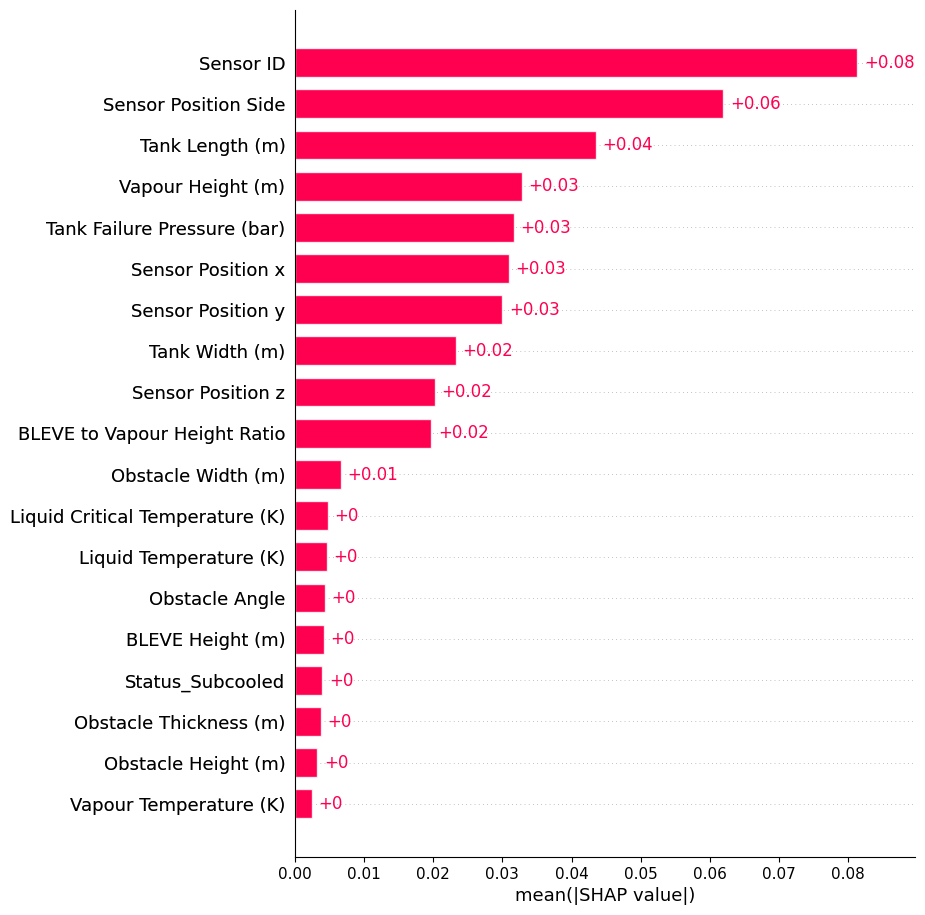

In [80]:

import shap


# Step 1: Use the already trained best_lgb_model
# Step 2: Use the same scaled data and feature names
feature_names = X_train.columns.tolist()

# Step 3: Create the SHAP explainer and compute SHAP values
explainer = shap.Explainer(best_lgb_model, X_train_scaled, feature_names=feature_names)
shap_values = explainer(X_val_scaled)

# Step 4: Plot bar chart of mean absolute SHAP values
shap.plots.bar(shap_values, max_display=30)

# Optional: beeswarm plot to see full SHAP distribution
# shap.plots.beeswarm(shap_values, max_display=30)


**SHAP Summary Plot**

Higher Sensor ID values strongly increase prediction, and lower values decerease it showing location differences in pressure. The effect is present but less pronounced for Sensor Position Side, suggesting middle positions are recording higher pressure.

Longer tanks lead to higher pressure than less long ones, most likely due to enahced structural integrity. Tank width also exhibits simialr behavior at a smaller scale.

Sensor positions x, y and z seem to capture decreased pressure with higher values and increased pressure at lower values, thuis lending more credence to the positional variation findings from Sensor ID and Position Side.

Higher tank failure pressure also increases target pressure, thus showing that stronger-rated tanks may blow at higher pressure than weaker-rated ones. Vapour Height increase also drives up predictions, demonstrating that more vapour leads to increased internal pressure. BLEVE to Vapor Height Ratio decreases predictions when higher and increases when lower.

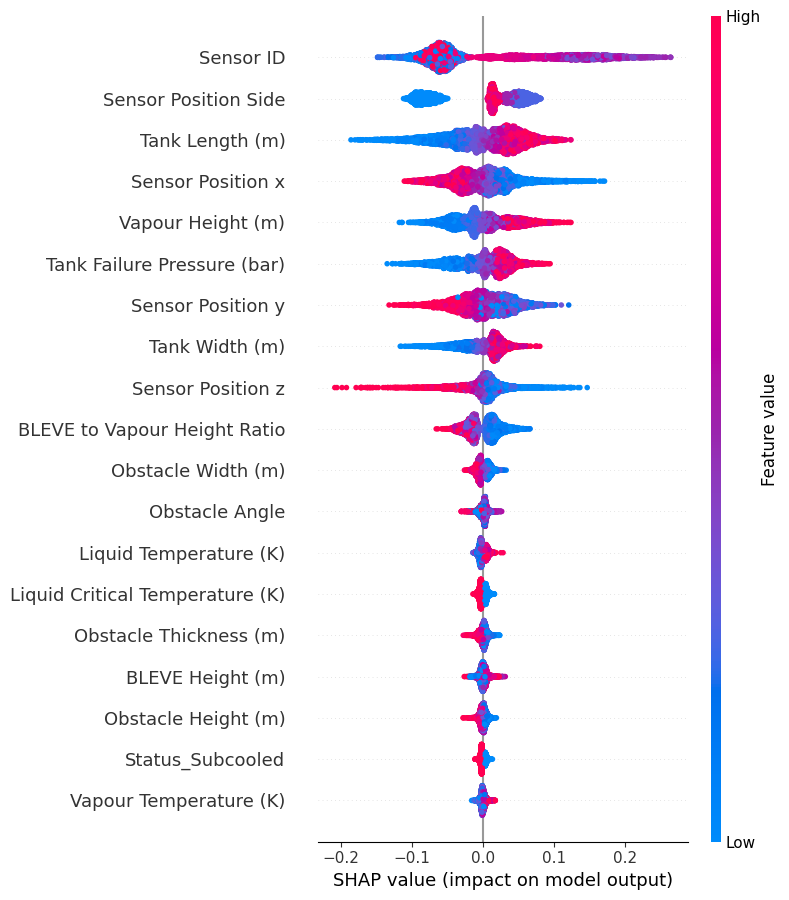

In [81]:

# Use TreeExplainer for LightGBM
explainer = shap.TreeExplainer(best_lgb_model)
shap_values = explainer.shap_values(X_train_scaled)

# Get feature names
feature_names = X_train.columns

# Plot SHAP summary (feature effect plot)
shap.summary_plot(shap_values, X_train_scaled, feature_names=feature_names)  # detailed version


**Partial Dependence Plot of Top 5 Features**

Vapour Height alone shows a stepwise strong effect, and Sensor ID and Tank Length may be more predictive in combination with other features or exhibit multicollinearity. Lower sensor position y and z show strong prediction, showing a pattern of high values closer to BLEVE epicenter.

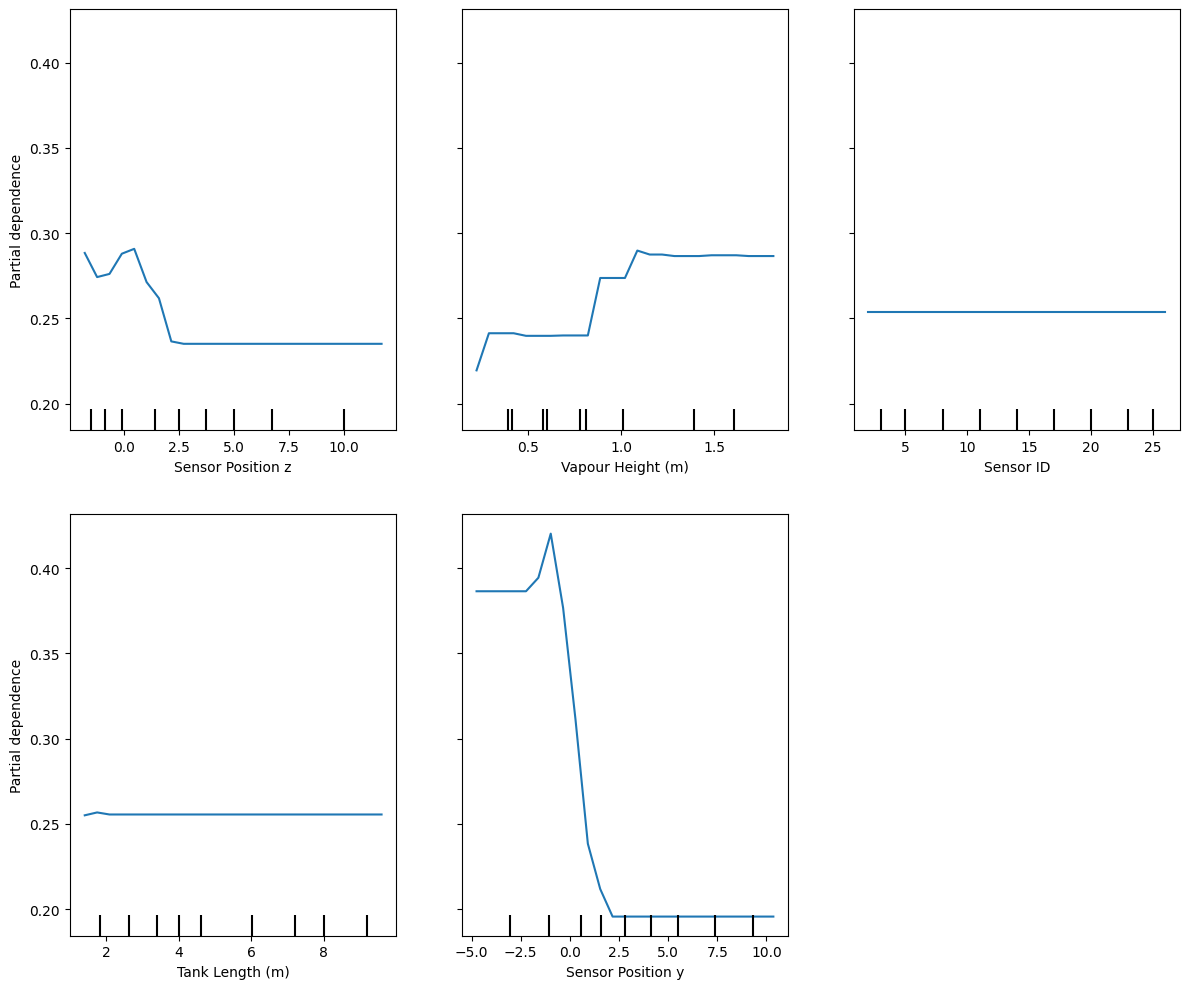

In [82]:

from sklearn.inspection import PartialDependenceDisplay

# Step 1: Use TreeExplainer without passing data
explainer = shap.TreeExplainer(best_lgb_model)
shap_values = explainer.shap_values(X_train)  # unscaled X_train

# Step 2: Get top 5 features based on mean absolute SHAP values
mean_shap = np.abs(shap_values).mean(axis=0)
feature_names = X_train.columns.tolist()
top5_indices = np.argsort(mean_shap)[-5:]
top5_features = [feature_names[i] for i in top5_indices]

# Step 3: PDP using unscaled data
fig, ax = plt.subplots(figsize=(12, 10))
PartialDependenceDisplay.from_estimator(
    best_lgb_model,
    X_train,
    features=top5_features,
    kind='average',
    grid_resolution=25,
    ax=ax
)
plt.tight_layout()
plt.show()


**SHAP Feature Interaction Plot**
Sensor ID and Sensor Position ID show their multicollinearity here, as their interaction value spans nearly the full range of the plot.

BLEVE to Vapour Height Ratio to BLEVE Height also shows strong interaction; a higher ratio when the BLEVE Height is smaller leads to lower predictions. But multicollinearity is laos exhibited here due to the original feature being inherent in the engineered one.

Top 2 most correlated feature pairs: [('Sensor ID', 'Sensor Position Side'), ('BLEVE to Vapour Height Ratio', 'BLEVE Height (m)')]

Plotting SHAP interaction for Sensor ID and Sensor Position Side


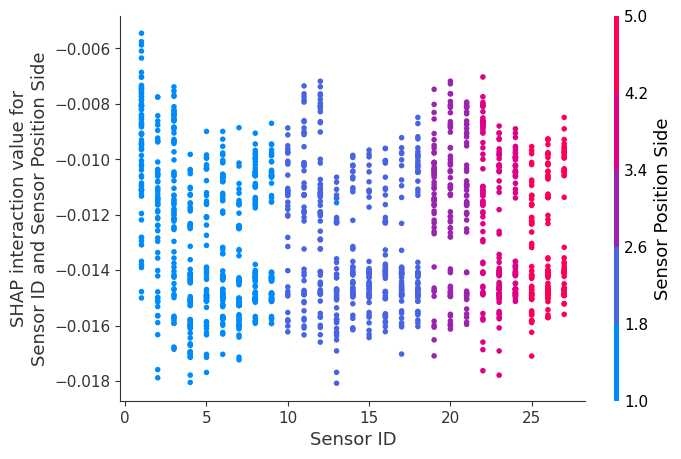


Plotting SHAP interaction for BLEVE to Vapour Height Ratio and BLEVE Height (m)


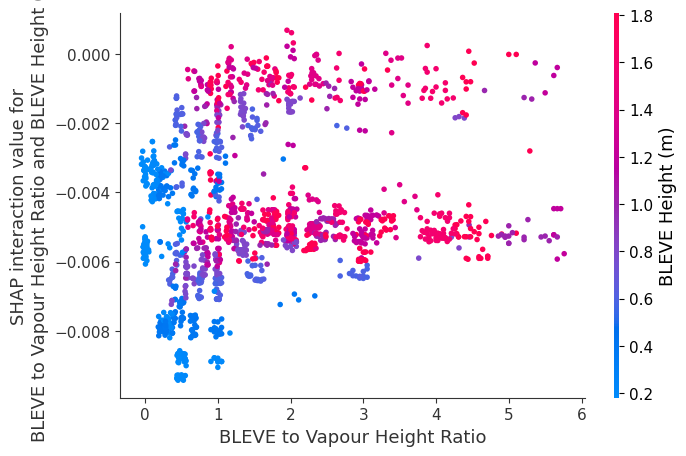

In [83]:
import shap
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Correlation matrix from unscaled training data
correlation_matrix = X_train.corr().abs()
np.fill_diagonal(correlation_matrix.values, 0)

# Step 2: Find top 2 most correlated feature pairs
stacked_corr = correlation_matrix.unstack()
sorted_corr = stacked_corr.sort_values(ascending=False)

top_pairs = []
for (f1, f2), corr_value in sorted_corr.items():
    if f1 != f2 and set([f1, f2]) not in [set(p) for p in top_pairs]:
        top_pairs.append((f1, f2))
        if len(top_pairs) == 2:
            break

print("Top 2 most correlated feature pairs:", top_pairs)

# Step 3: Use TreeExplainer instead of generic Explainer
explainer = shap.TreeExplainer(best_lgb_model)  # use tree-based SHAP explainer
shap_interaction_values = explainer.shap_interaction_values(X_val)  # use unscaled validation set

# Step 4: Plot interaction plots for the two most correlated pairs
for f1, f2 in top_pairs:
    try:
        print(f"\nPlotting SHAP interaction for {f1} and {f2}")
        f1_idx = X_train.columns.get_loc(f1)
        f2_idx = X_train.columns.get_loc(f2)

        shap.dependence_plot(
            (f1_idx, f2_idx),
            shap_interaction_values,
            X_val,
            feature_names=X_train.columns.tolist(),
            display_features=X_val  # Unscaled, readable axes
        )
    except Exception as e:
        print(f"Could not plot interaction for {f1} and {f2}: {e}")

plt.show()



### 5.2 Instances Interpretation

**Lowest Prediction**

An extreme-tailed sensor ID value, positive sensor positions x, y and z and high

BLEVE Vapour to Height Ratio pushed the value down. Long tank Length and high tank Failure Pressure drove the value up, protecting the tank longer.

Lowest Prediction


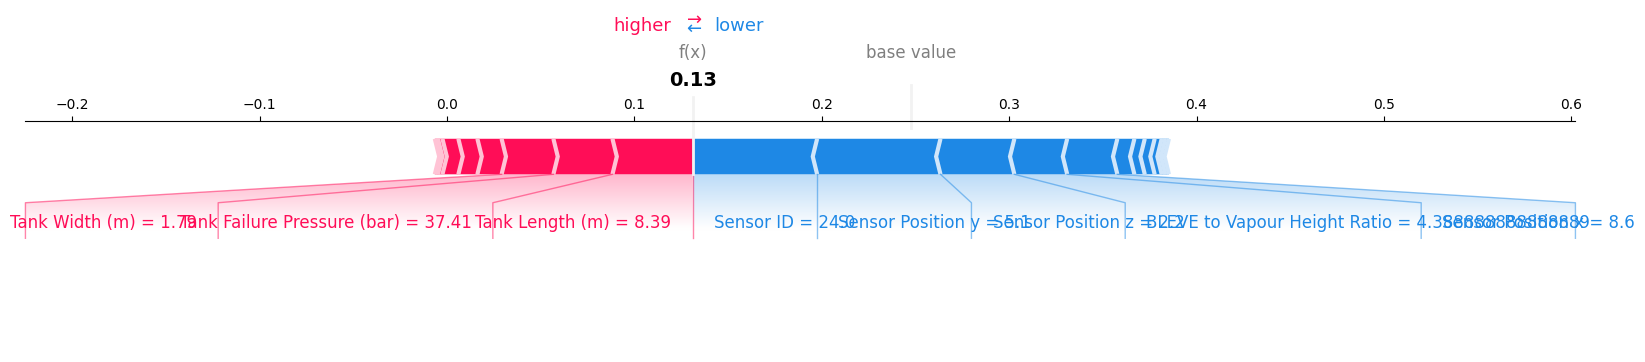

In [87]:
# Enable SHAP interactive plots
shap.initjs()

# Use TreeExplainer with LightGBM and unscaled data
explainer_lgb = shap.TreeExplainer(best_lgb_model)

# Compute SHAP values on unscaled training data
shap_values_lgb = explainer_lgb.shap_values(X_train)

# Get model predictions and errors
y_pred_train = best_lgb_model.predict(X_train)
errors_lgb = np.abs((y_train.values - y_pred_train) / y_train.values)

# Identify index of lowest prediction
lowest_idx = np.argmin(y_pred_train)

# Create interactive force plot for lowest prediction
print("Lowest Prediction")
shap.force_plot(
    explainer_lgb.expected_value,
    shap_values_lgb[lowest_idx],
    X_train.iloc[lowest_idx],
    matplotlib=True # Turn false for interactive plot
)


**Highest Prediction**

Short tank Length, Vapour Heightm, extreme tailed sensor y and z coordinates and low tank failure pressure drove the highest pressure value. Positive x sensor coordinate, low BLEVE to Vapour Height ratio, and high obstacle width contributed most majorly to reduce this value.

Highest Prediction


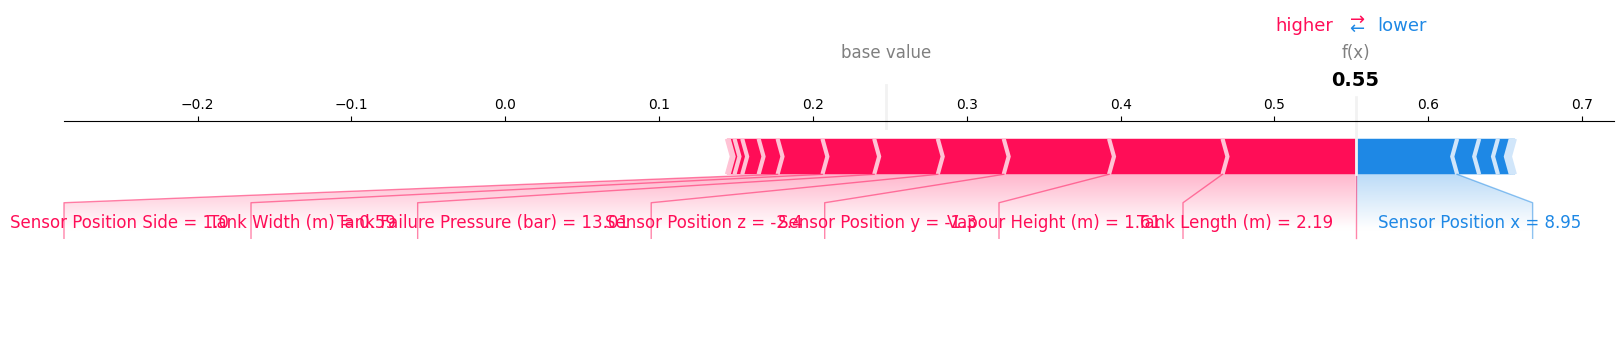

In [88]:
# Enable SHAP interactive plots
shap.initjs()
# Identify index of highest prediction
highest_idx = np.argmax(y_pred_train)

# Create interactive force plot for highest prediction
print("Highest Prediction")
shap.force_plot(
    explainer_lgb.expected_value,
    shap_values_lgb[highest_idx],
    X_train.iloc[highest_idx],
    matplotlib=True
)


**Largest Prediction Error**

Short tank length, high tank failurte pressure, short vapor height, small tank width driving up the prediction collided with extreme sensor x coordinate values, extreme Sensor Position Side and low BLEVE to Vapour Height Ratio driving down the prediction. The collision of extreme, high and low values led to the largest prediction error in this instance.

Largest Prediction Error


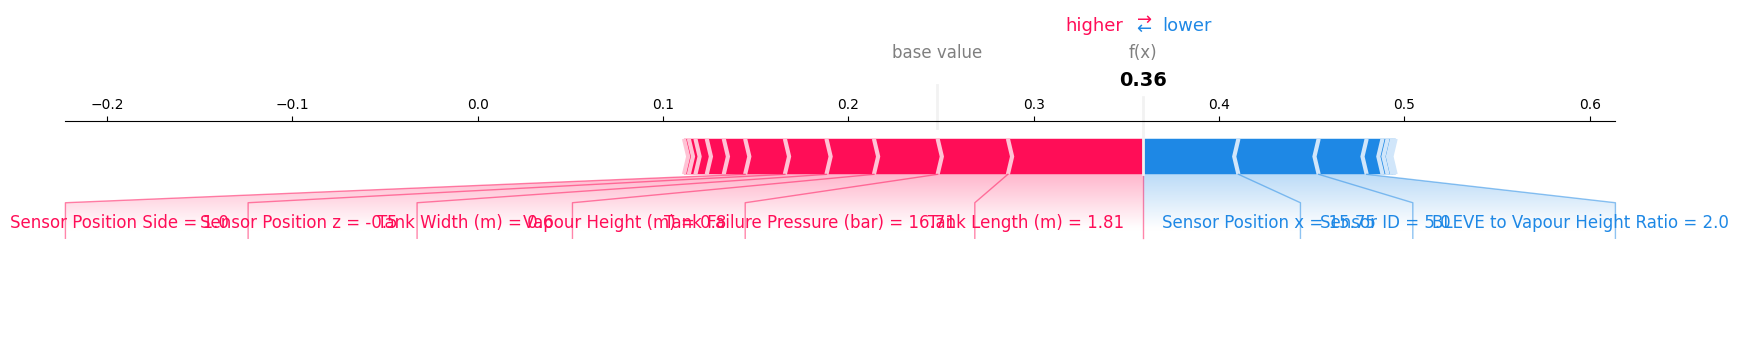

In [89]:
# Enable SHAP interactive plots
shap.initjs()
# Identify index of largest prediction error
largest_error_idx = np.argmax(errors_lgb)

# Create interactive force plot for largest error
print("Largest Prediction Error")
shap.force_plot(
    explainer_lgb.expected_value,
    shap_values_lgb[largest_error_idx],
    X_train.iloc[largest_error_idx],
    matplotlib=True
)


Thank you for reading this notebook.